In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Задание 1
Написать функцию gauss(A, b, pivoting), которая возвращает решение СЛАУ, полученное с помощью метода Гаусса.

In [3]:
n = 5
A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        A[i][j] = random.randrange(0,10)
print(A)
b = np.zeros((n, 1))
for i in range(n):
    b[i] = random.randrange(0,10)
print(b.shape)    
c =  np.concatenate((A, b), axis = 1)
print(c)

[[5. 5. 1. 6. 8.]
 [4. 0. 9. 7. 6.]
 [8. 4. 8. 4. 0.]
 [9. 2. 4. 9. 6.]
 [4. 7. 1. 8. 5.]]
(5, 1)
[[5. 5. 1. 6. 8. 5.]
 [4. 0. 9. 7. 6. 0.]
 [8. 4. 8. 4. 0. 9.]
 [9. 2. 4. 9. 6. 1.]
 [4. 7. 1. 8. 5. 1.]]


In [4]:
def gauss(A, b, pivoting):
    n = b.shape[0]
    matrix =  np.concatenate((A, b), axis = 1)
    x = np.zeros(b.shape)
    index = np.arange(0, n)
    for i in range(n):
        if pivoting:
            sec_matrix = np.abs(matrix[i:, i:n])
            max_row, max_col = np.unravel_index(np.argmax(sec_matrix), sec_matrix.shape)
            matrix[[i, max_row + i], :] = matrix[[max_row + i, i], :]
            matrix[:, [i, max_col + i]] = matrix[:, [max_col + i, i]]
            index[i], index[max_col + i] = index[max_col + i], index[i]
        for j in range(i + 1, n):
            coef = matrix[j][i] / matrix[i][i]
            matrix[j, :] -= coef * matrix[i, :]
    for i in range(n - 1, -1, -1):
        x[i] = matrix[i, -1]
        for j in range(i + 1, n):
            x[i] -= x[j] * matrix[i][j]
        x[i] /= matrix[i][i]
    if pivoting:
        idx = np.argsort(index)
        return x[idx]
    return(x)

In [5]:
n = 5
A = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        A[i][j] = random.randrange(0,10)
b = np.zeros((n, 1))
for i in range(n):
    b[i] = random.randrange(0,10)  
c =  np.concatenate((A, b), axis = 1)
print(c)

print(gauss(A, b, True))

[[5. 1. 8. 2. 1. 0.]
 [2. 6. 5. 7. 4. 8.]
 [1. 8. 4. 1. 0. 3.]
 [9. 6. 4. 8. 4. 5.]
 [6. 5. 4. 9. 1. 7.]]
[[-0.55488266]
 [ 0.29598789]
 [ 0.06056018]
 [ 0.94473883]
 [ 0.10446631]]


In [6]:
A = np.array([[2, -1, 0, 0, 0],
[-3, 8, -1, 0, 0],
[0, -5, 12, 2, 0],
[0, 0, -6, 18, -4],
[0, 0, 0, -5, 10]], dtype=np.float32)
b = np.array([-25, 72, -69, -156, 20], dtype=np.float32)
b = b.reshape(5, 1)
print(gauss(A, b, False))
print(gauss(A, b, True))

[[-10.00000001]
 [  4.99999998]
 [ -2.0000001 ]
 [-10.0000004 ]
 [ -3.        ]]
[[-10.00000045]
 [  4.99999957]
 [ -1.99999991]
 [-10.        ]
 [ -3.00000012]]


# Задание 2
Написать функцию thomas(A, b), которая возвращает решение СЛАУ, полученное с помощью метода прогонки.

In [7]:
def thomas(A, b):
    n = b.shape[0]
    gamma = np.zeros(b.shape)
    betta = np.zeros(b.shape)
    x = np.zeros(b.shape)
    for i in range(1, n):
        gamma[i] = -A[i-1][i] / (A[i-1][i-2] * gamma[i-1] + A[i-1][i-1])
        betta[i] = (b[i-1] - A[i-1][i-2] * betta[i-1]) / (A[i-1][i-2] * gamma[i-1] + A[i-1][i-1])
    x[n-1] = (b[n-1] - A[n-1][n-2] * betta[n-1]) / (A[n-1][n-1] + A[n-1][n-2] * gamma[n-1])
    for i in range(n - 2, -1, -1):
        x[i] = gamma[i+1] * x[i+1] + betta[i+1]
    return(x)

In [8]:
A = np.array([[2, -1, 0, 0, 0],
[-3, 8, -1, 0, 0],
[0, -5, 12, 2, 0],
[0, 0, -6, 18, -4],
[0, 0, 0, -5, 10]], dtype=np.float32)
b = np.array([-25, 72, -69, -156, 20], dtype=np.float32)
b = b.reshape(5, 1)
print(thomas(A, b))

[[-10.]
 [  5.]
 [ -2.]
 [-10.]
 [ -3.]]


# Задание 3
Написать функцию cholesky(A, b), которая возвращает решениеСЛАУ, полученное с помощью разложения Холецкого.

In [9]:
def cholesky(A, b):
    n = b.shape[0]
    L = np.zeros(A.shape)
    x = np.zeros((b.shape[0],))
    for i in range(n):
        for j in range(i):
            summa = sum([L[i][k] * L[j][k] for k in range(j)])
            L[i][j] = 1/L[j][j] * (A[i][j] - summa)
        summa = sum([(L[i][k])**2 for k in range(i)])
        L[i][i] = math.sqrt(A[i][i] - summa)
    L_T = L.T
    for i in range(n):
        x[i] = b[i]
        x[i] -= np.sum(L[i, :i] * x[:i])
        x[i] /= L[i][i]
    for i in range(n - 1, -1, -1):
        x[i] -= np.sum(L_T[i, i + 1:] * x[i + 1:])
        x[i] /= L_T[i][i]
    return(x.reshape(b.shape))

In [10]:
A = np.array([[4, 1, -1, 0],
[1, 3, -1, 0],
[-1, -1, 5, 2],
[0, 0, 2, 4]], dtype=np.float32)
b = np.array([7, 8, -4, 6], dtype=np.float32)
b = b.reshape(4, 1)
print(cholesky(A, b))

[[ 1.]
 [ 2.]
 [-1.]
 [ 2.]]


In [11]:
A = np.array([[81, -45, 45],
[-45, 50, -15],
[45, -15, 38]], dtype=np.float32)
b = np.array([531, -460, 193], dtype=np.float32)
b = b.reshape(3, 1)
print(A@cholesky(A, b))

[[ 531.]
 [-460.]
 [ 193.]]


# Задание 5

Генератор случайных невырожденных вещественно-значных матриц общего вида

In [12]:
def general_matrix(n):
    A = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            A[i][j] = np.random.beta(0.5,0.5)
    while np.linalg.det(A) < 1e-12:
        for i in range(n):
            for j in range(n):
                A[i][j] = np.random.beta(0.5,0.5)
    return(A *2 - 1)

general_matrix(4)

array([[ 0.99929691, -0.7006505 , -0.9825112 , -0.91421521],
       [-0.99979807, -0.7456103 , -0.57454575,  0.97339741],
       [ 0.78947294, -0.76911873, -0.89148346,  0.78420226],
       [ 0.91324558, -0.12483164, -0.96086619,  0.99293981]])

Генератор случайных невырожденных вещественно-значных матриц со строгим диагональным преобладание

In [13]:
def diagonal_dominance_matrix(n):
    summa = 0
    A = general_matrix(n)
    for i in range(n):
        for j in range(n):
            if i != j:
                summa += abs(A[i][j])
        A[i][i] = np.sign(A[i][i]) * summa * np.random.uniform(1.01, 1.1)
        summa = 0   
    return(A / np.amax(A))

diagonal_dominance_matrix(4)

array([[-0.77514123, -0.08123118, -0.43734798, -0.22720533],
       [ 0.21123596,  0.87477643,  0.40900493, -0.19953629],
       [-0.26506927,  0.28952622, -0.9170242 ,  0.32210443],
       [-0.33395905, -0.31056792, -0.33983711,  1.        ]])

Генератор случайных невырожденных вещественно-значных трехдиагональных матриц

In [14]:
def tridiagonal_matrix(n):
    A = general_matrix(n)
    A = np.tril(A, 1)
    A = np.triu(A, -1)
    while np.linalg.det(A) < 1e-12:
        A = general_matrix(n)
        A = np.tril(A, 1)
        A = np.triu(A, -1)
    return(A)
tridiagonal_matrix(4)

array([[ 0.83042505, -0.84043816,  0.        ,  0.        ],
       [ 0.57940665, -0.81763255, -0.93046948,  0.        ],
       [ 0.        , -0.48423546, -0.81659893, -0.7044514 ],
       [ 0.        ,  0.        , -0.27688523, -0.90431107]])

Генератор случайных невырожденных вещественно-значных  положительно определенных матриц

In [20]:
def positive_definite_matrix(n):
    A = general_matrix(n)
    A = np.tril(A, 0)
    A = A @ A.T
    m = np.max(np.abs(A)) * np.random.uniform(1.0001, 1.01)
    return A / m

A = positive_definite_matrix(4)
print(A)

[[ 0.40846065 -0.40693184 -0.37499449  0.27383266]
 [-0.40693184  0.81841264  0.62241769 -0.26638409]
 [-0.37499449  0.62241769  0.99780434 -0.7357604 ]
 [ 0.27383266 -0.26638409 -0.7357604   0.67750971]]


## Пункт с

In [21]:
n = 4
general_matrices = []
diagonal_dominance_matrices = []
tridiagonal_matrices = []
positive_definite_matrices = []

N = 1000

for i in range(N):
    general_matrices.append(general_matrix(n))
    diagonal_dominance_matrices.append(diagonal_dominance_matrix(n))
    tridiagonal_matrices.append(tridiagonal_matrix(n))
    positive_definite_matrices.append(positive_definite_matrix(n))

## Пункт d

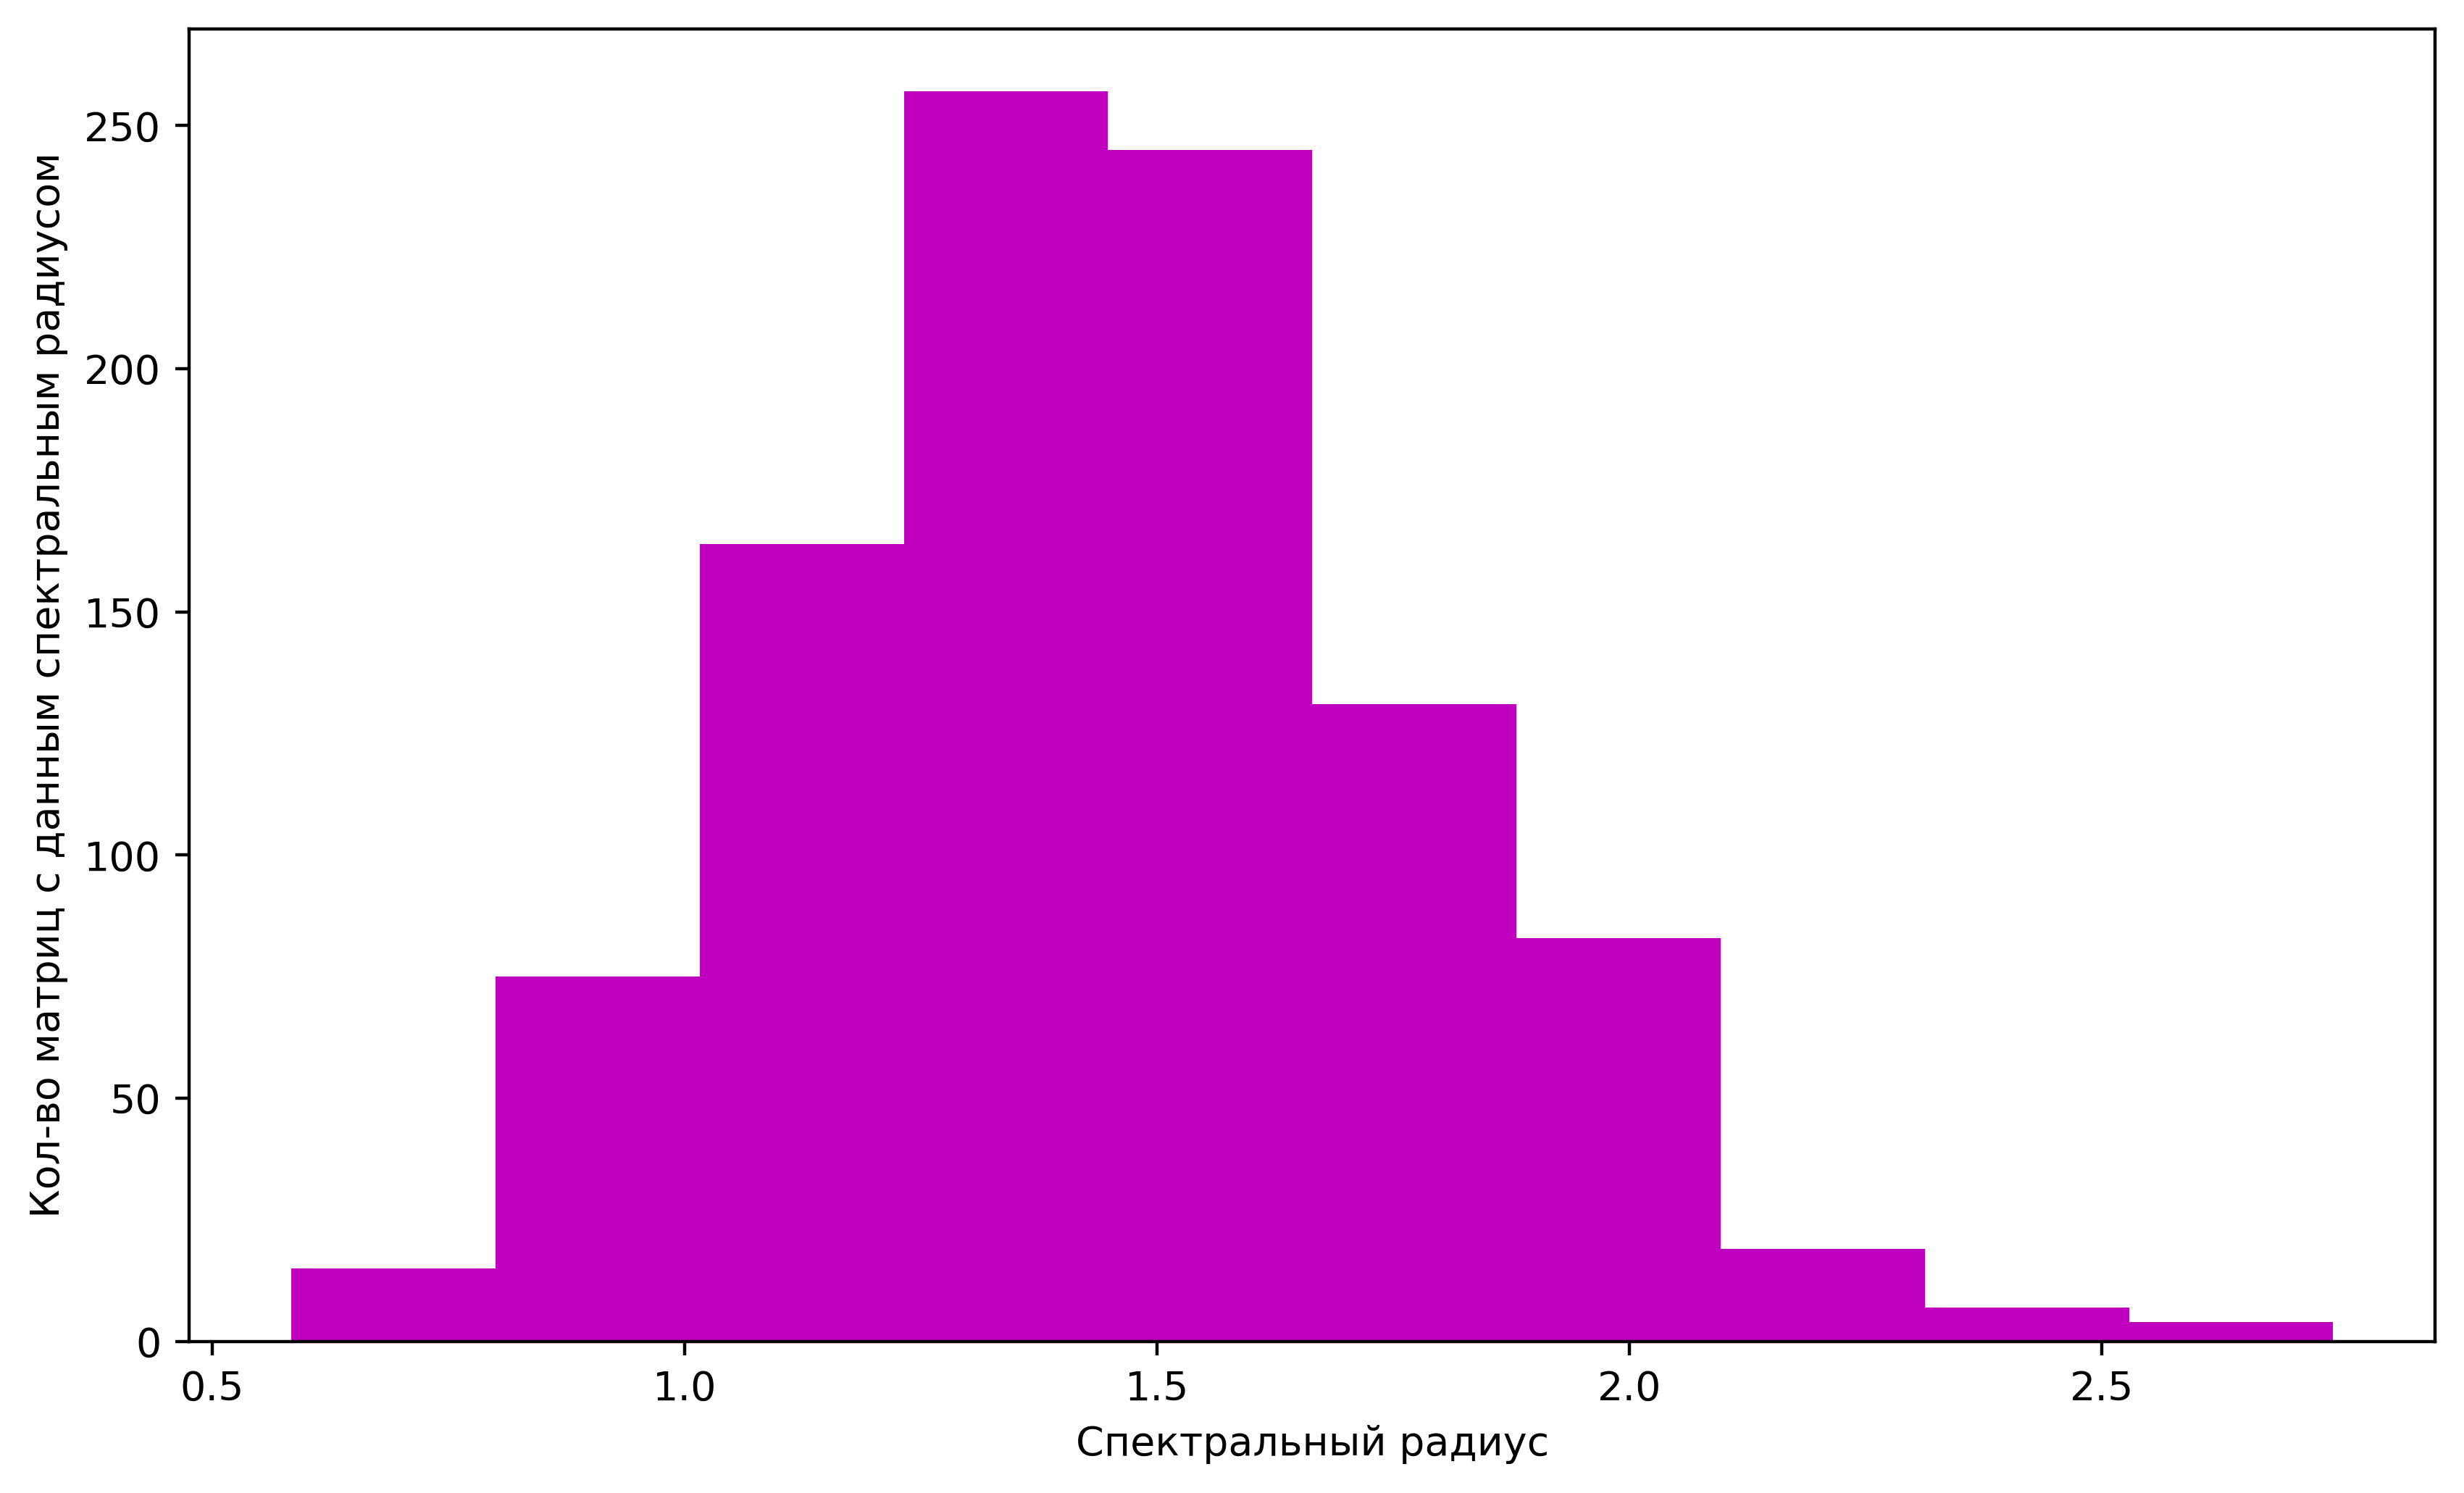

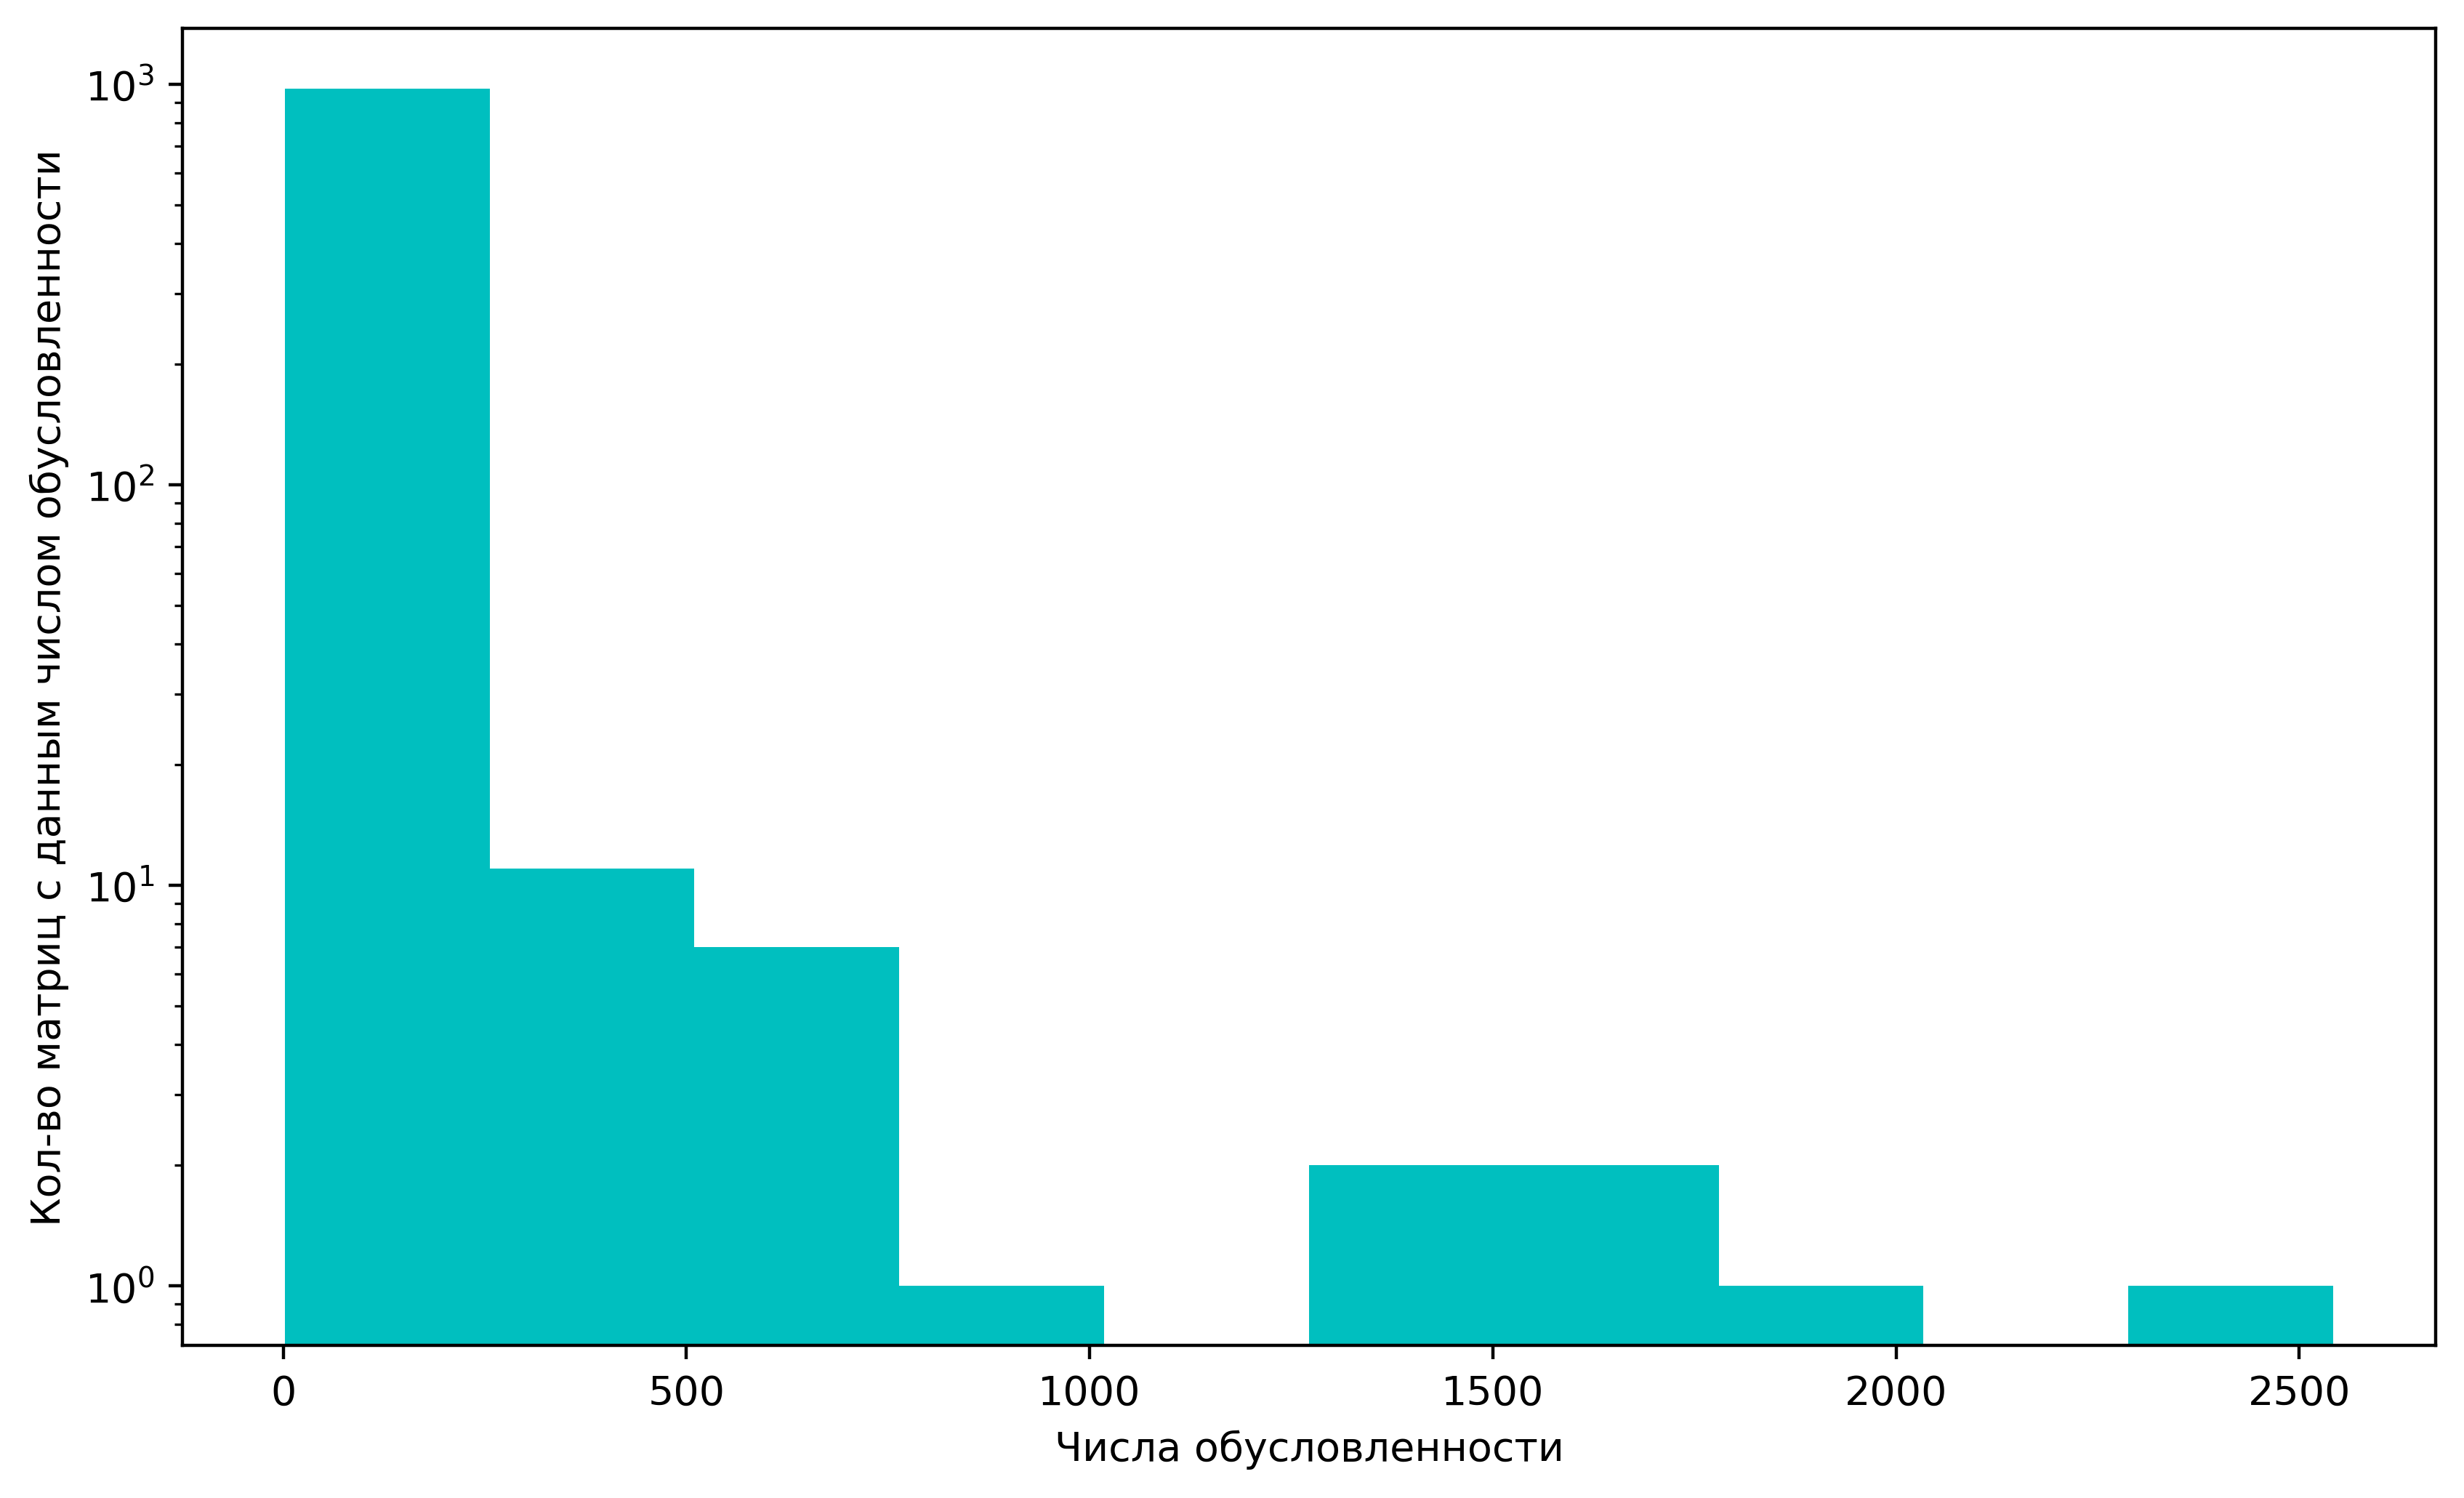

In [22]:
spectral_radii = np.zeros(N)
condition_numbers = np.zeros(N)
for i in range(N):
    spectral_radii[i] = np.max(np.abs(np.linalg.eigvals(general_matrices[i])))
    condition_numbers[i] = np.linalg.cond(general_matrices[i])
    
_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)    
plt.hist(spectral_radii, color='m')
plt.ylabel('Кол-во матриц с данным спектральным радиусом')
plt.xlabel('Спектральный радиус')
plt.show() 

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)  
plt.hist(condition_numbers, log = True, color='c')
plt.ylabel('Кол-во матриц с данным числом обусловленности')
plt.xlabel('Числа обусловленности')
plt.show()  

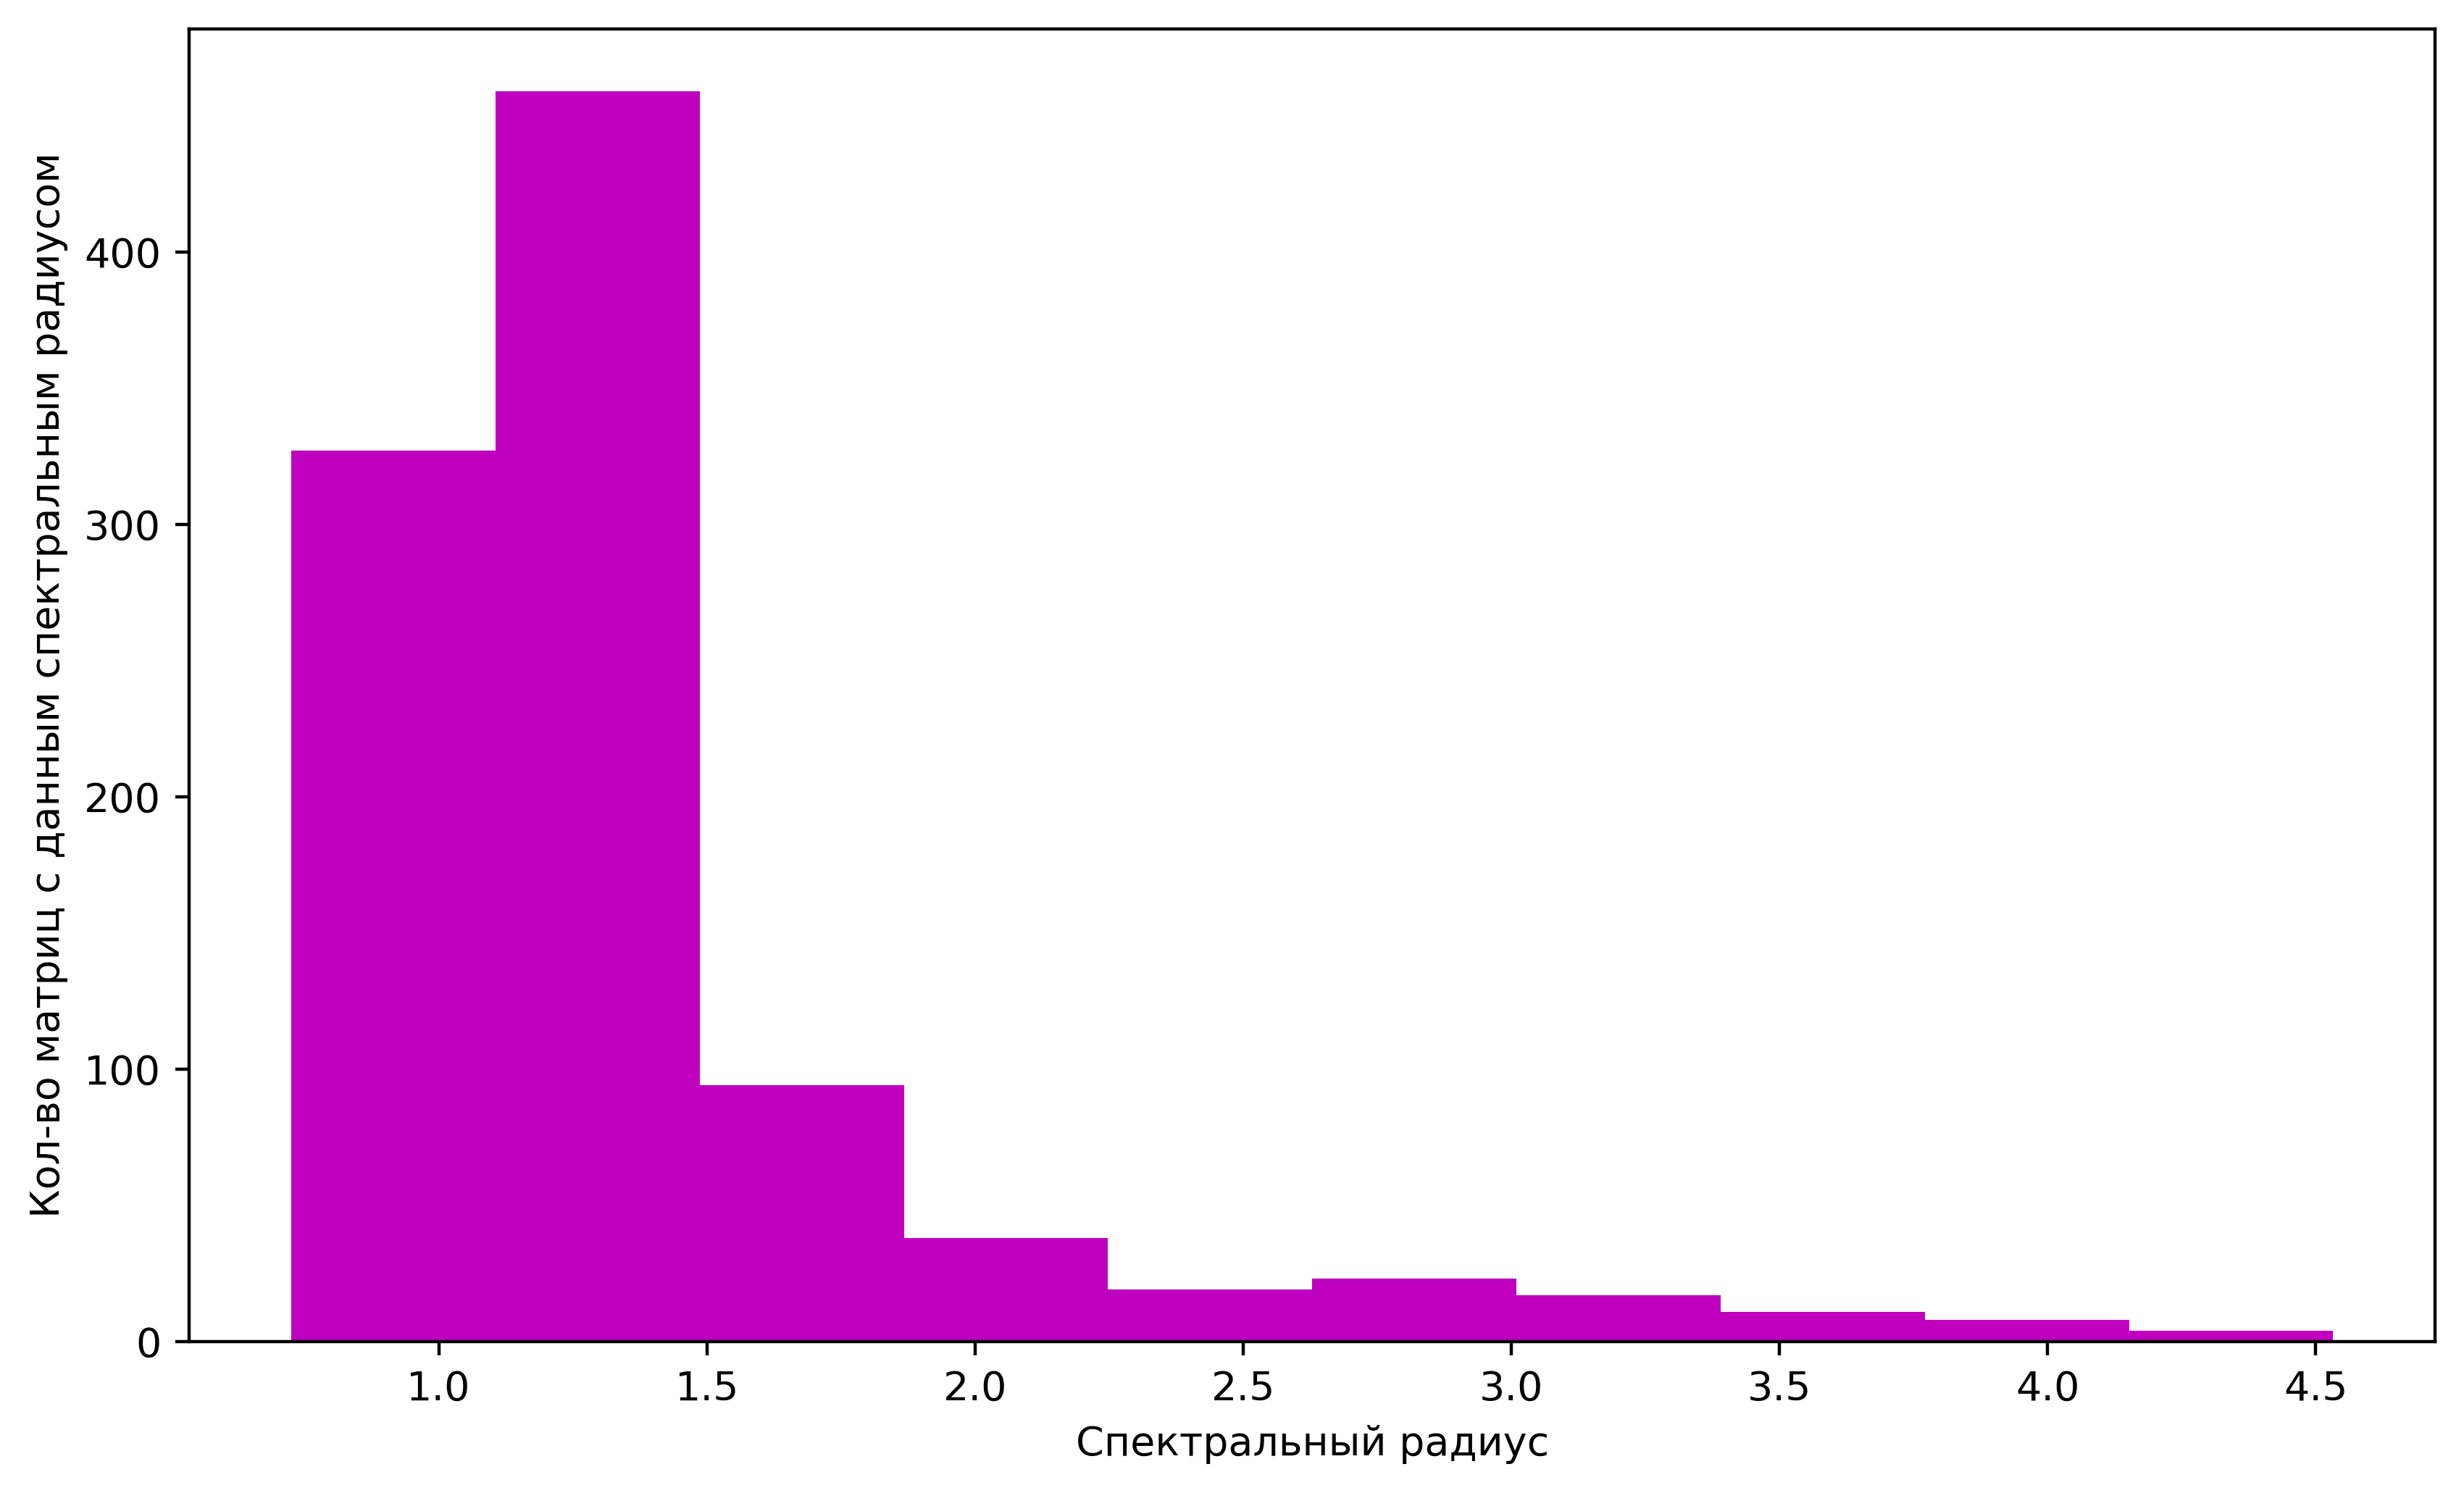

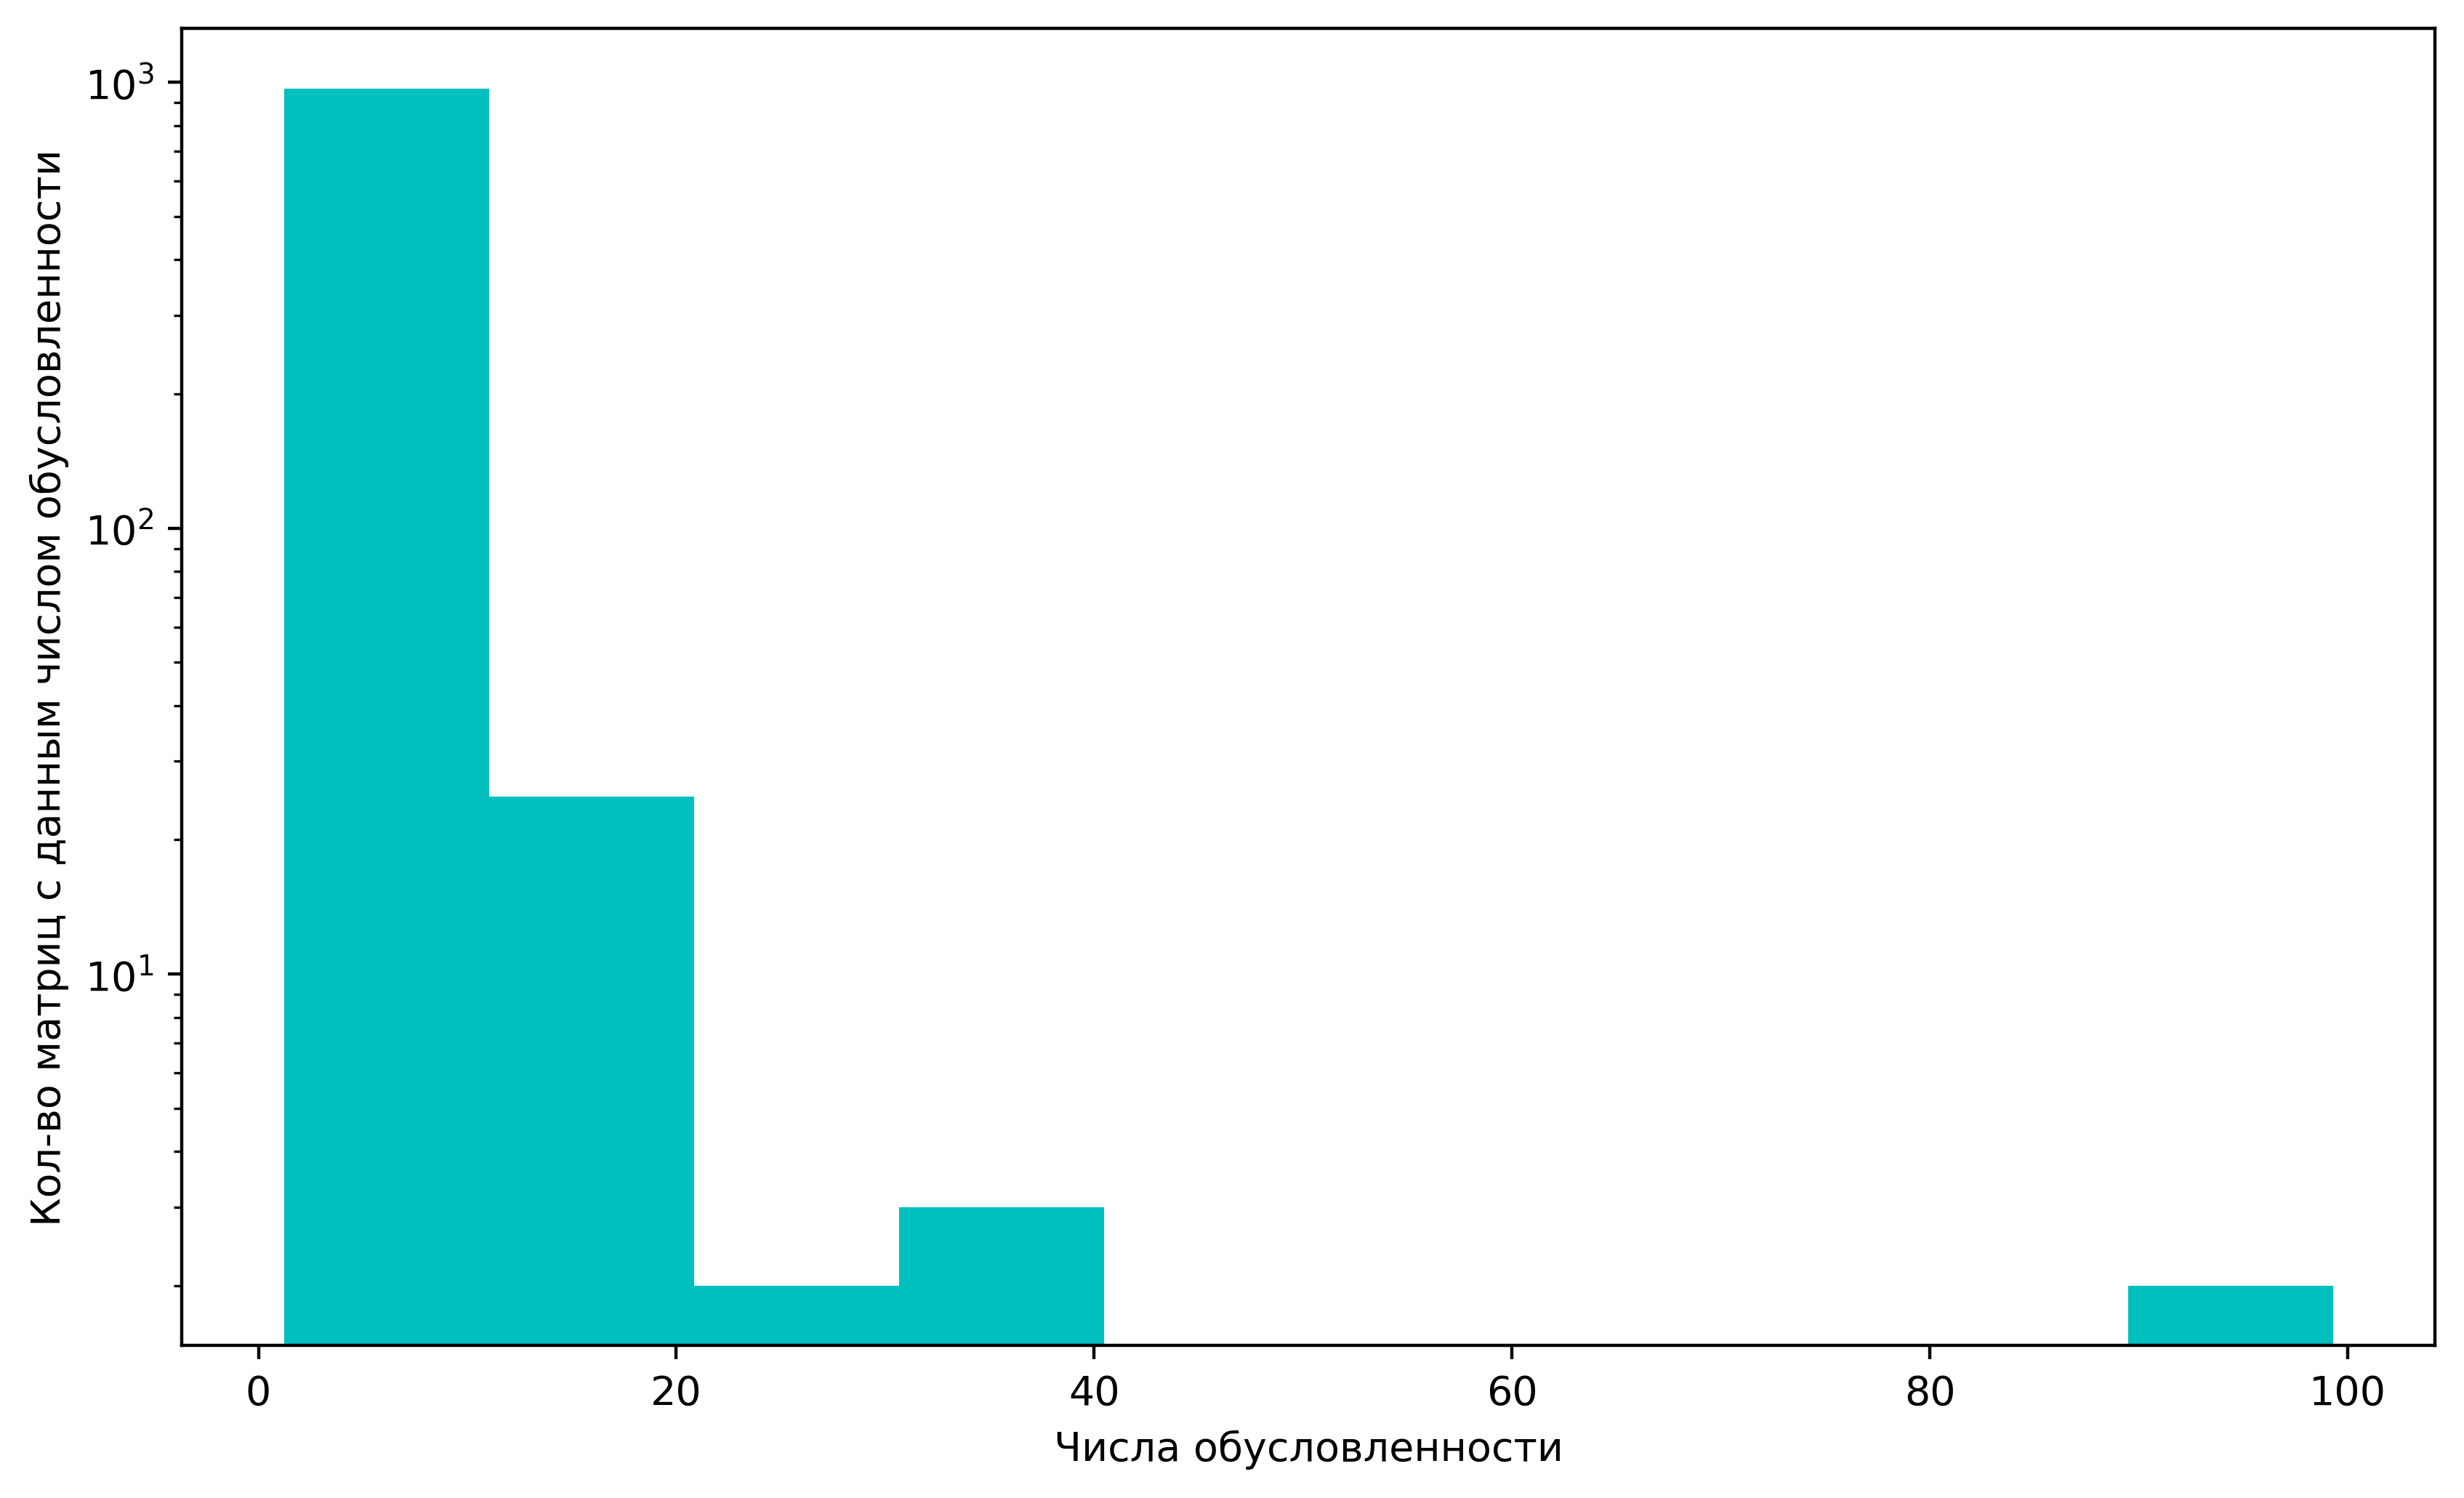

In [23]:
spectral_radii = np.zeros(N)
condition_numbers = np.zeros(N)
for i in range(N):
    spectral_radii[i] = np.max(np.abs(np.linalg.eigvals(diagonal_dominance_matrices[i])))
    condition_numbers[i] = np.linalg.cond(diagonal_dominance_matrices[i])

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)    
plt.hist(spectral_radii, color='m')
plt.ylabel('Кол-во матриц с данным спектральным радиусом')
plt.xlabel('Спектральный радиус')
plt.show() 

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)  
plt.hist(condition_numbers, log = True, color='c')
plt.ylabel('Кол-во матриц с данным числом обусловленности')
plt.xlabel('Числа обусловленности')
plt.show() 

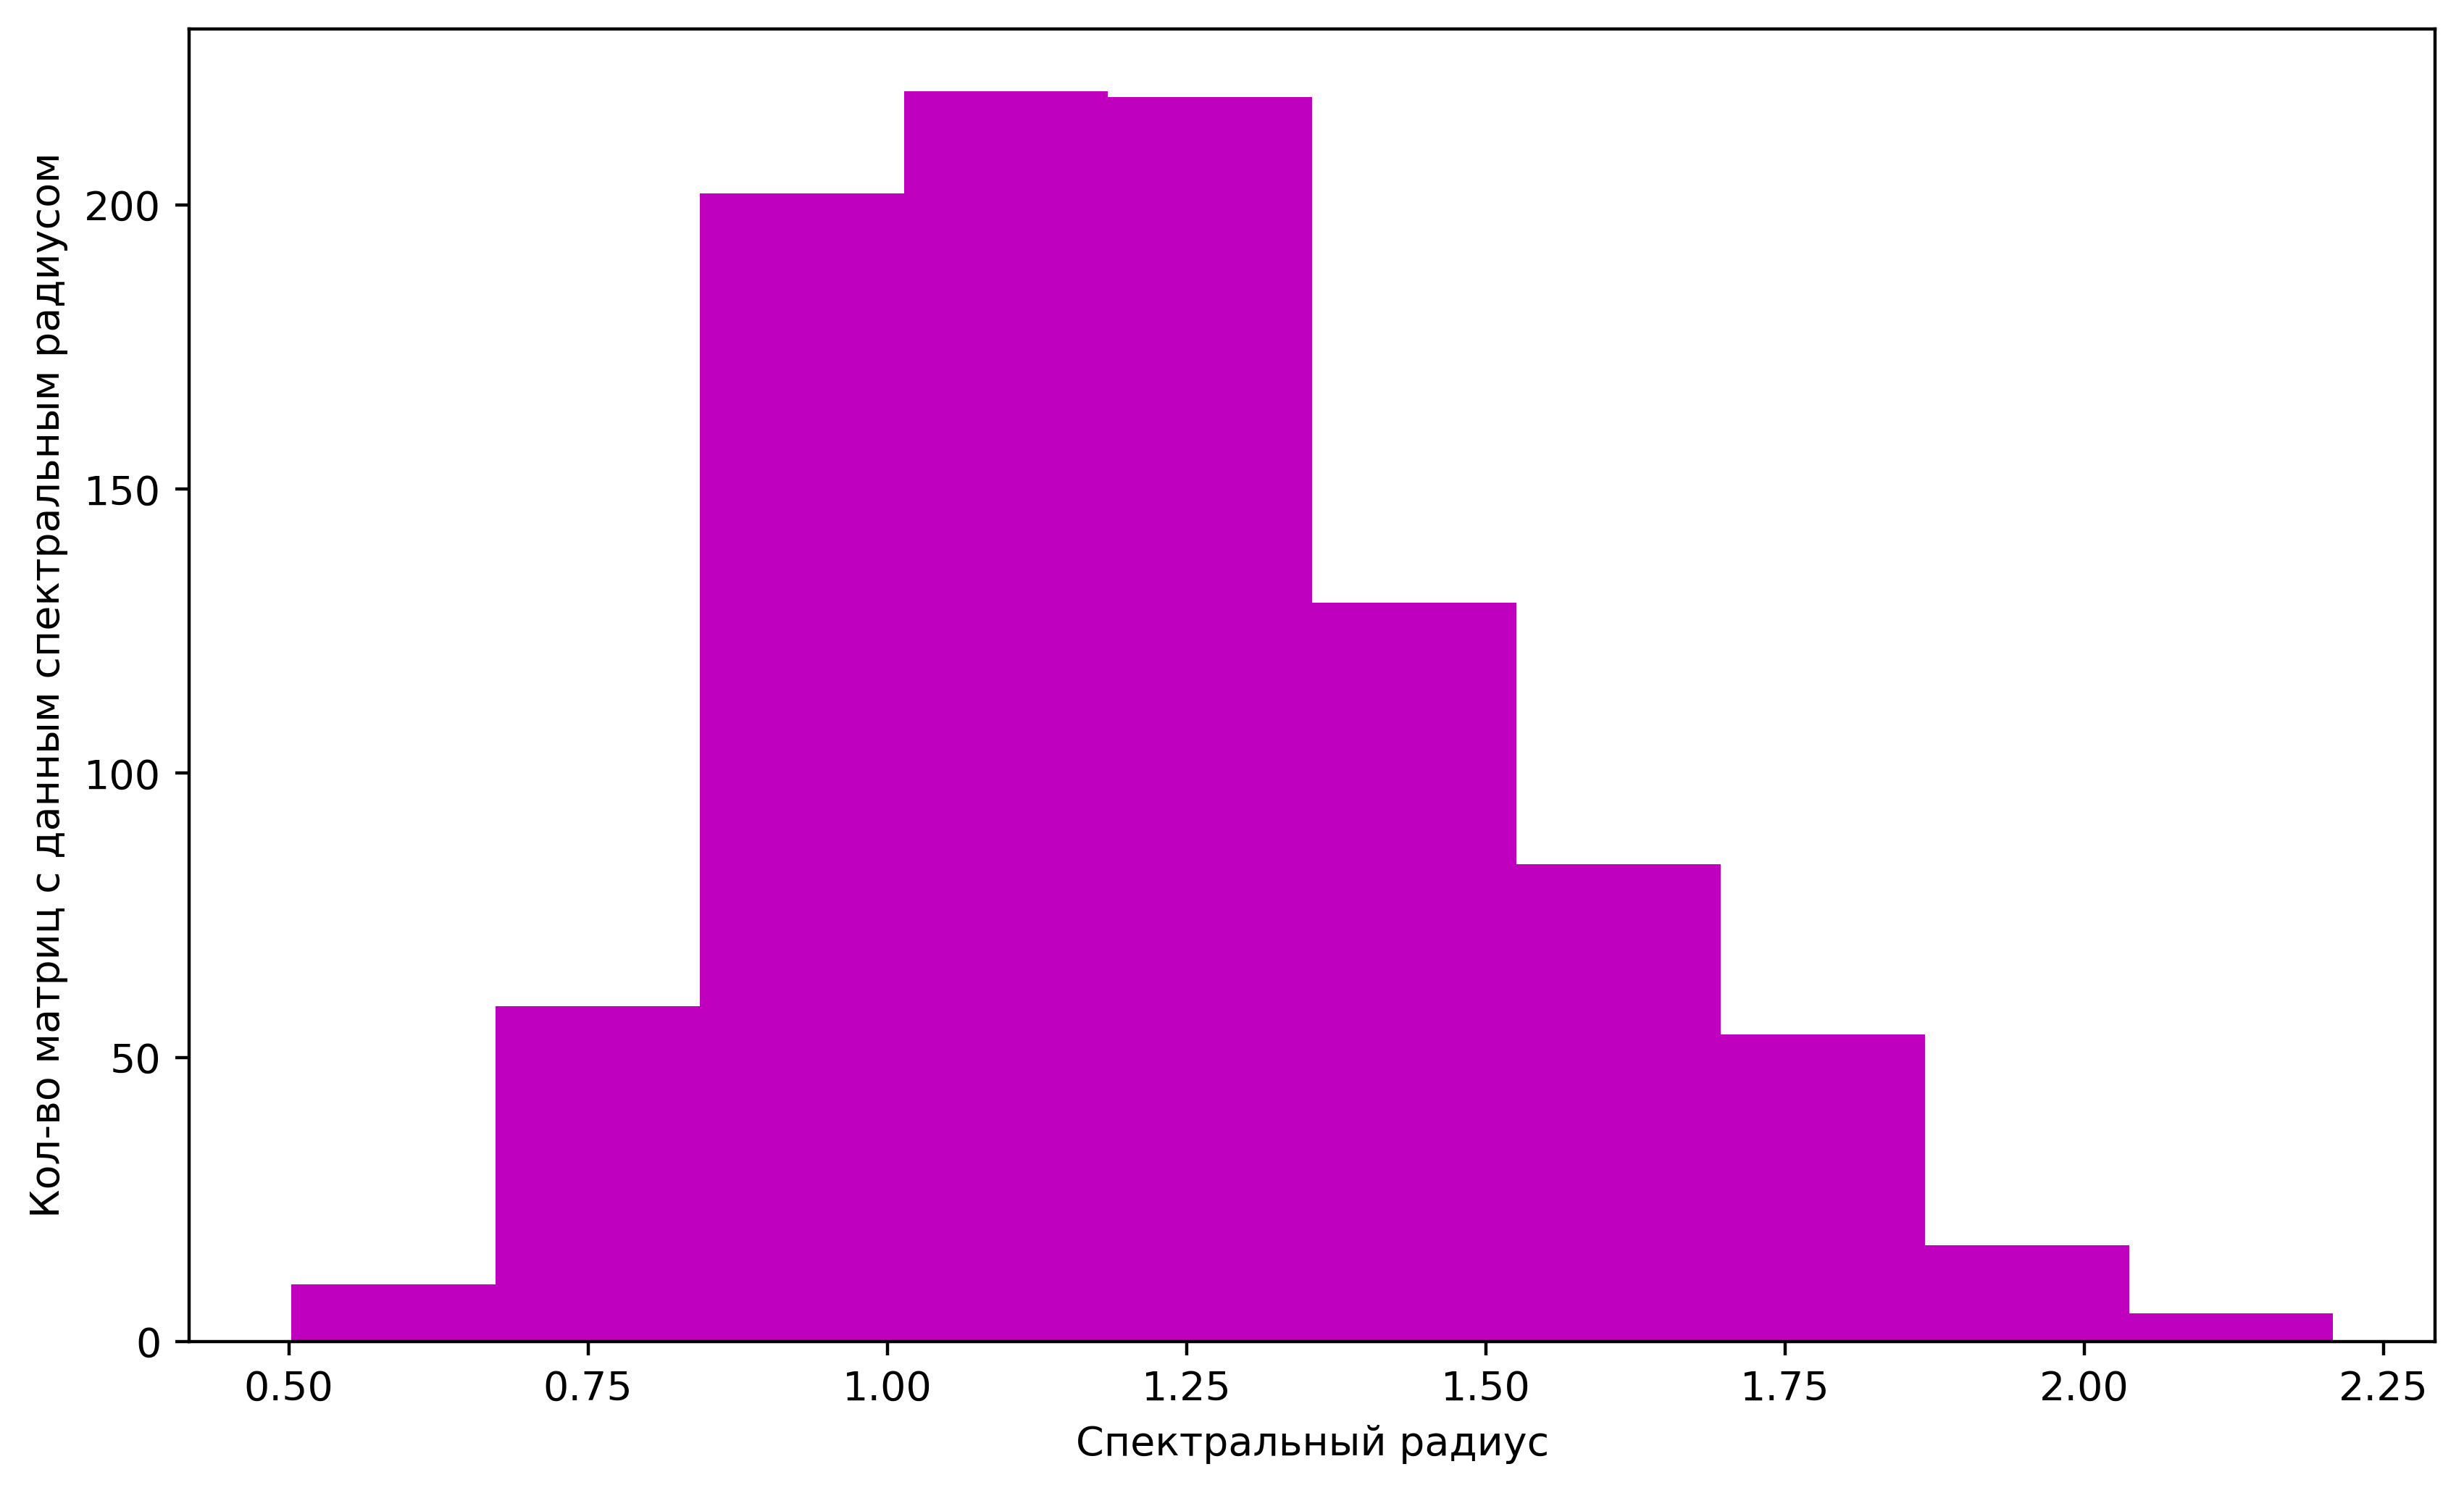

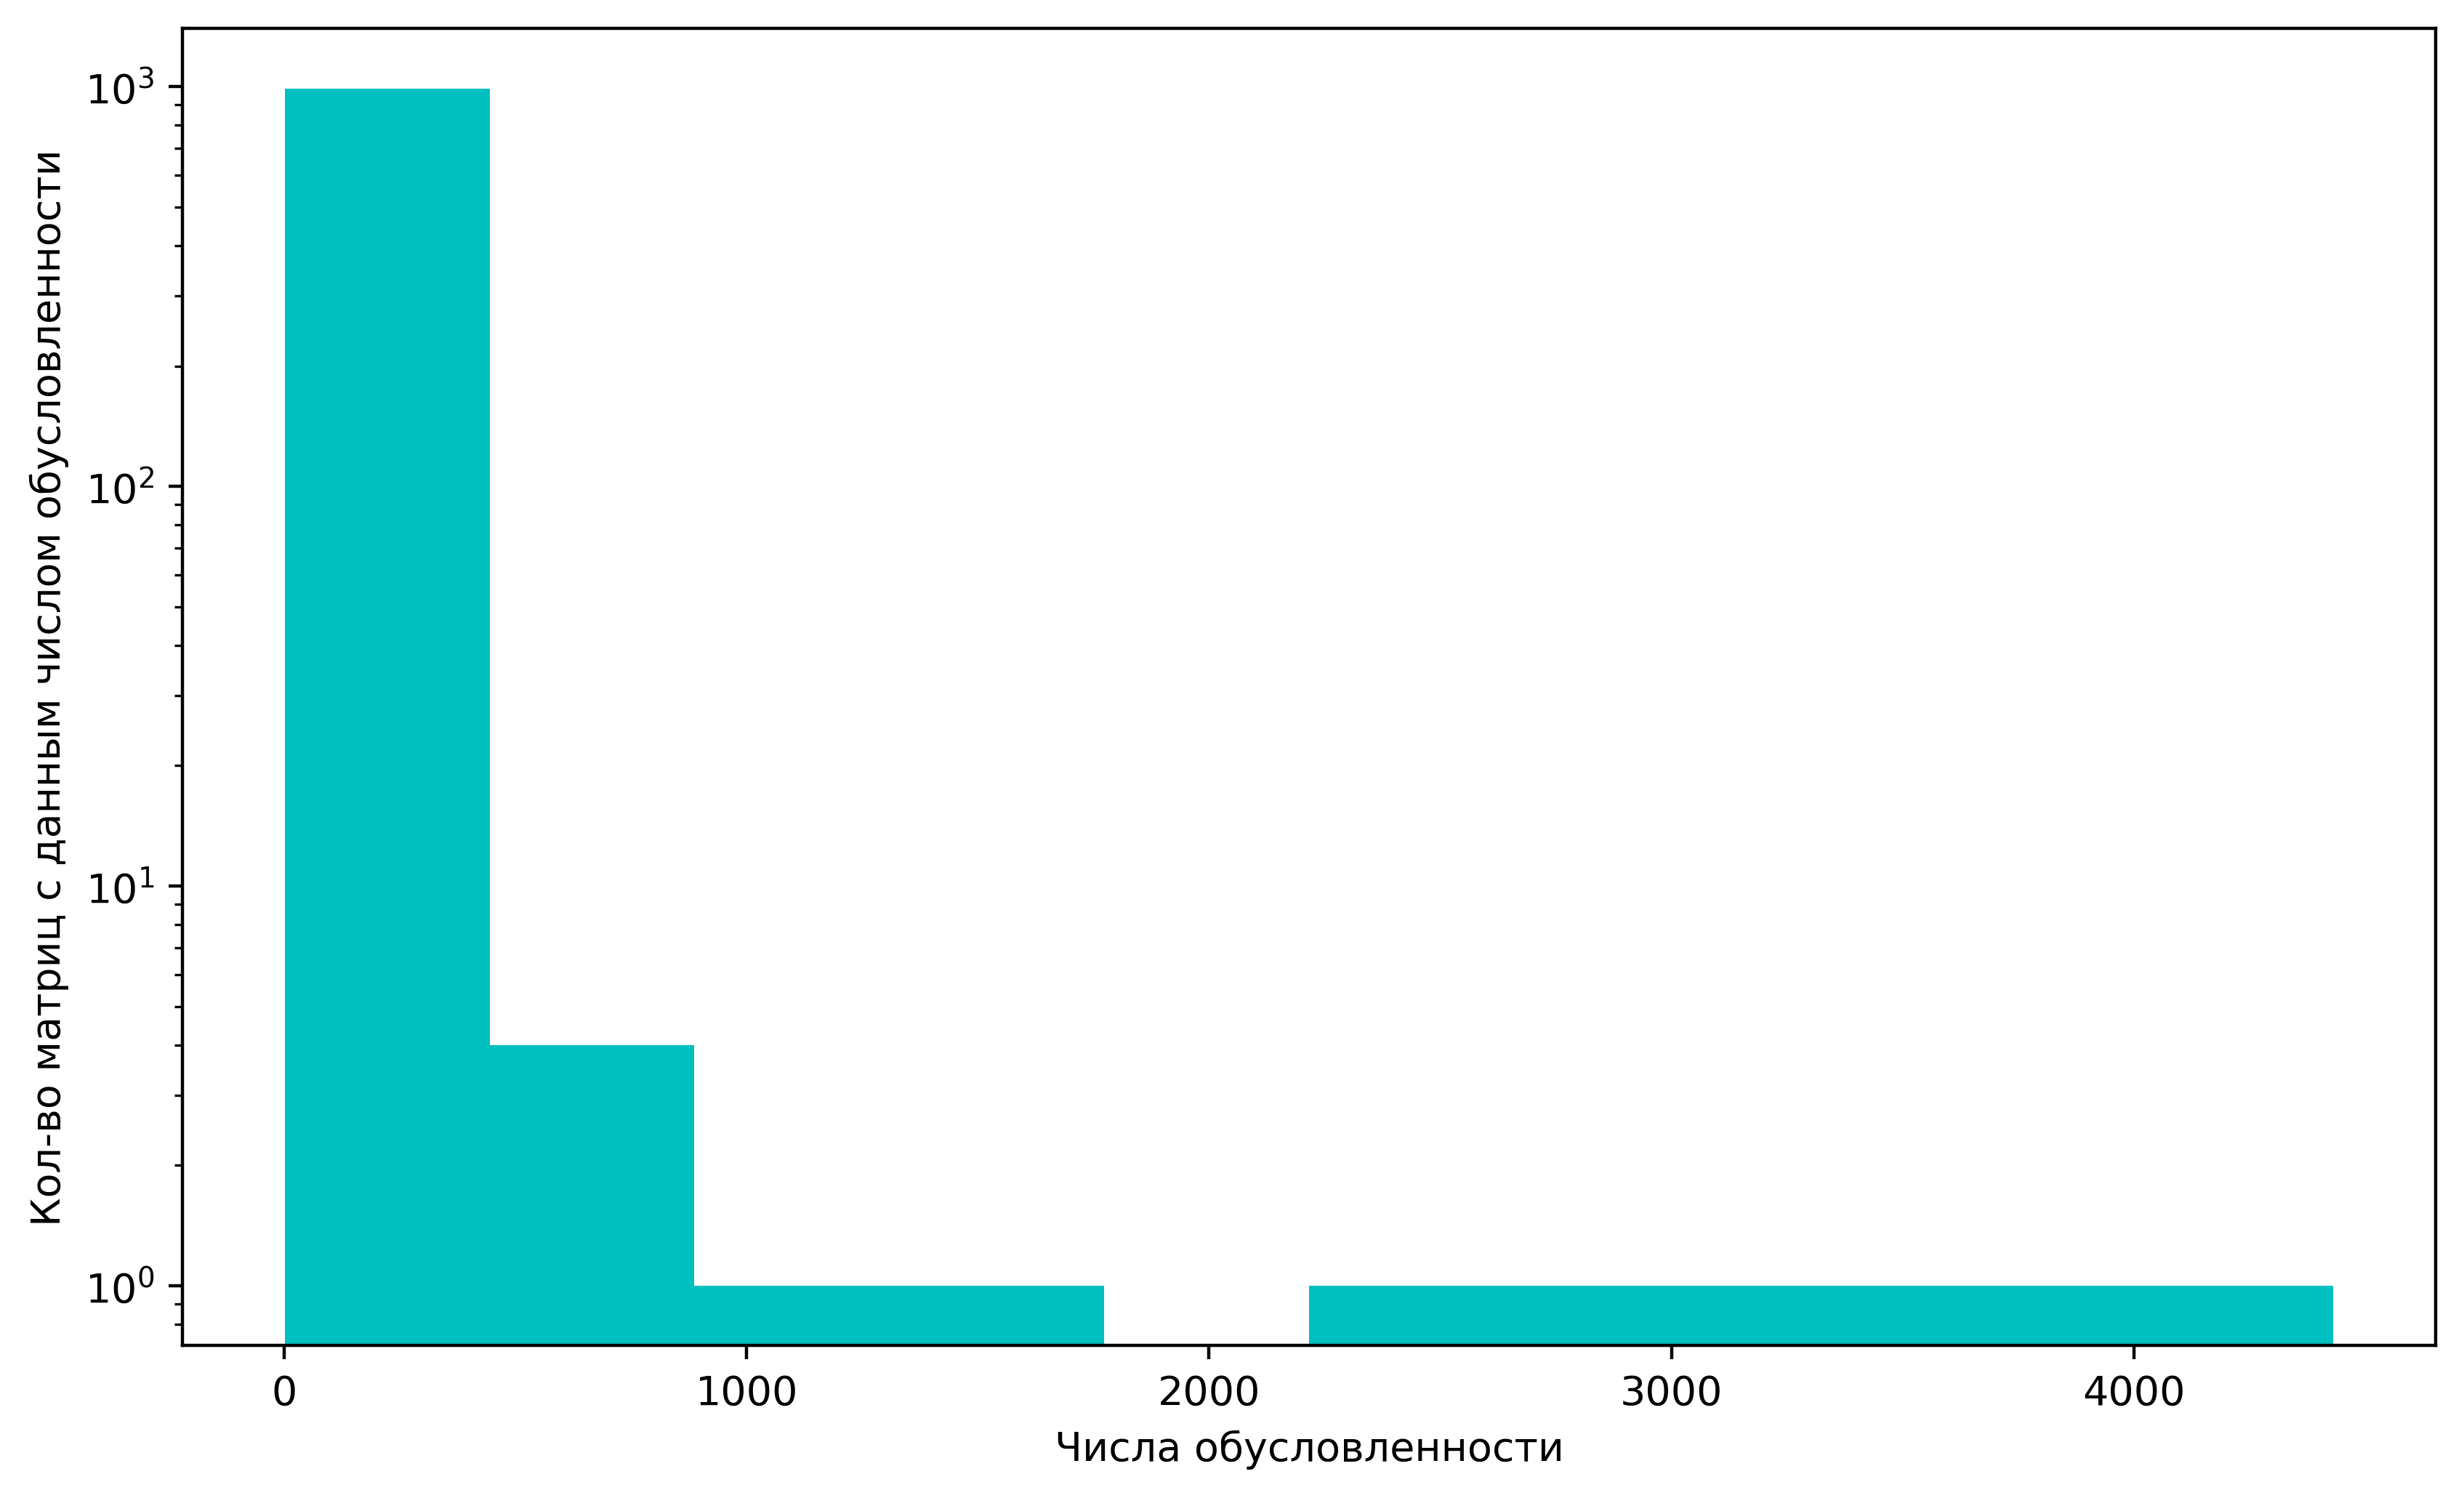

In [24]:
spectral_radii = np.zeros(N)
condition_numbers = np.zeros(N)
for i in range(N):
    spectral_radii[i] = np.max(np.abs(np.linalg.eigvals(tridiagonal_matrices[i])))
    condition_numbers[i] = np.linalg.cond(tridiagonal_matrices[i])

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)    
plt.hist(spectral_radii, color='m')
plt.ylabel('Кол-во матриц с данным спектральным радиусом')
plt.xlabel('Спектральный радиус')
plt.show() 

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)  
plt.hist(condition_numbers, log = True, color='c')
plt.ylabel('Кол-во матриц с данным числом обусловленности')
plt.xlabel('Числа обусловленности')
plt.show() 

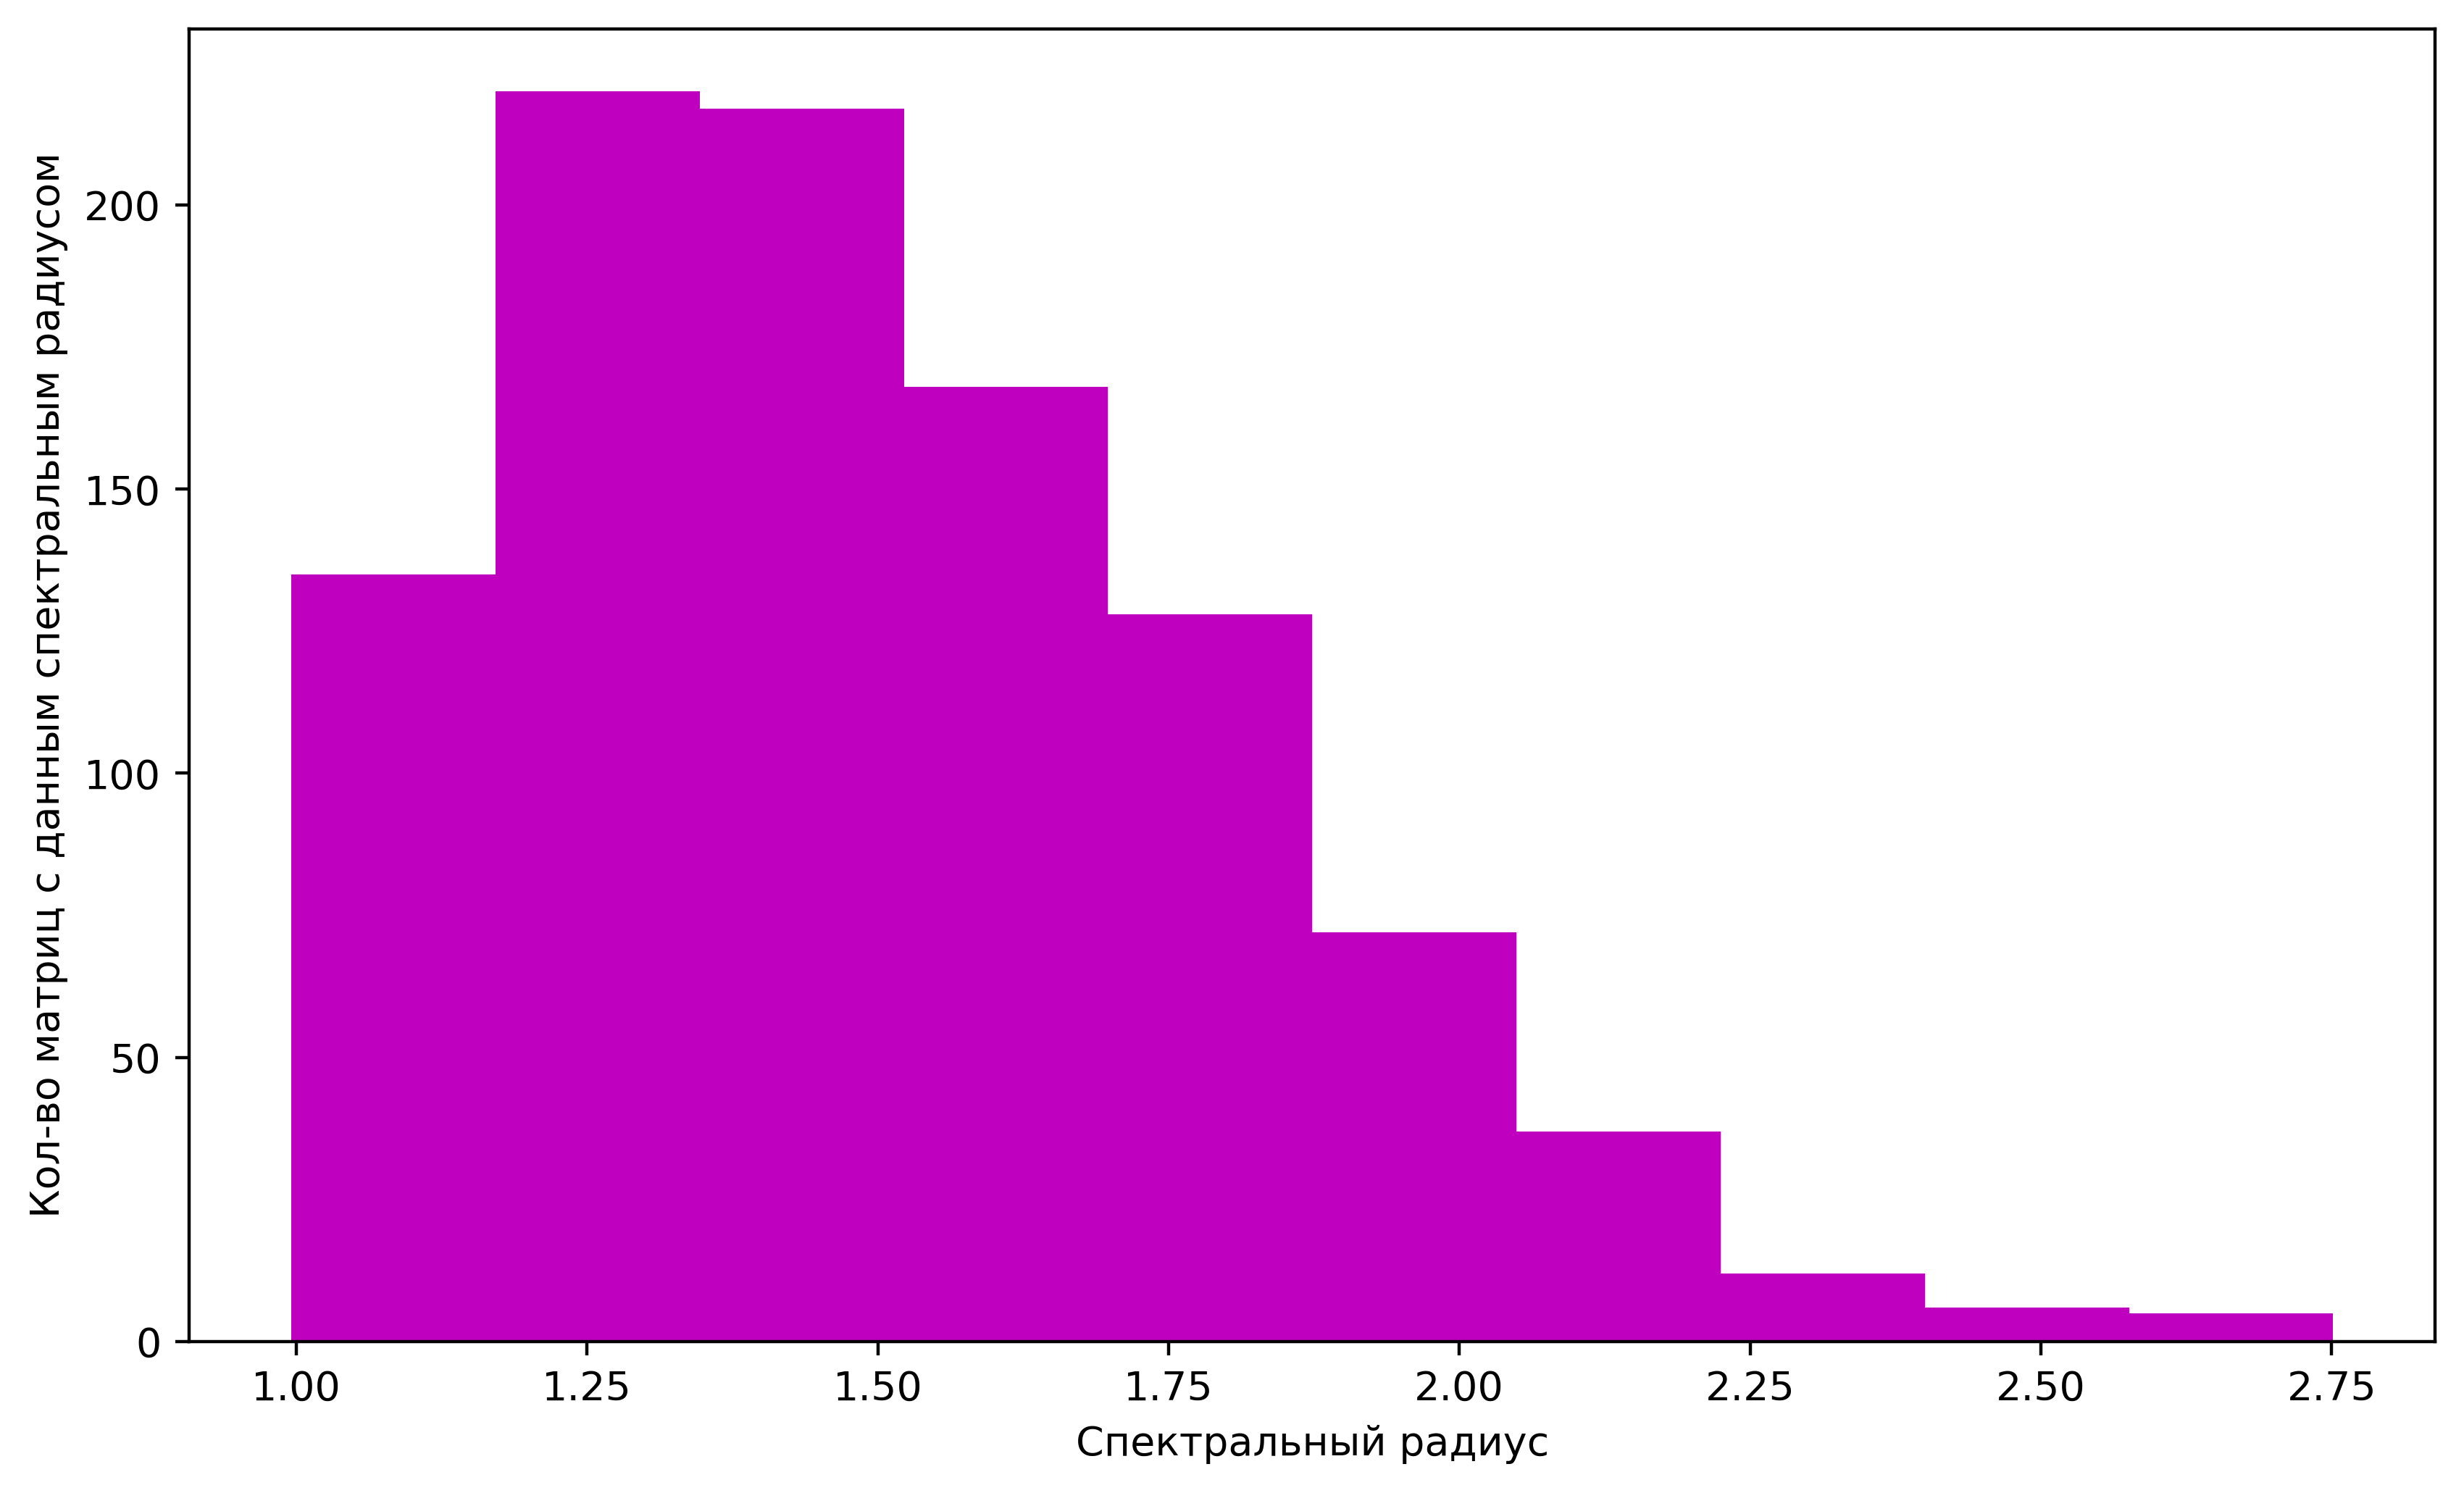

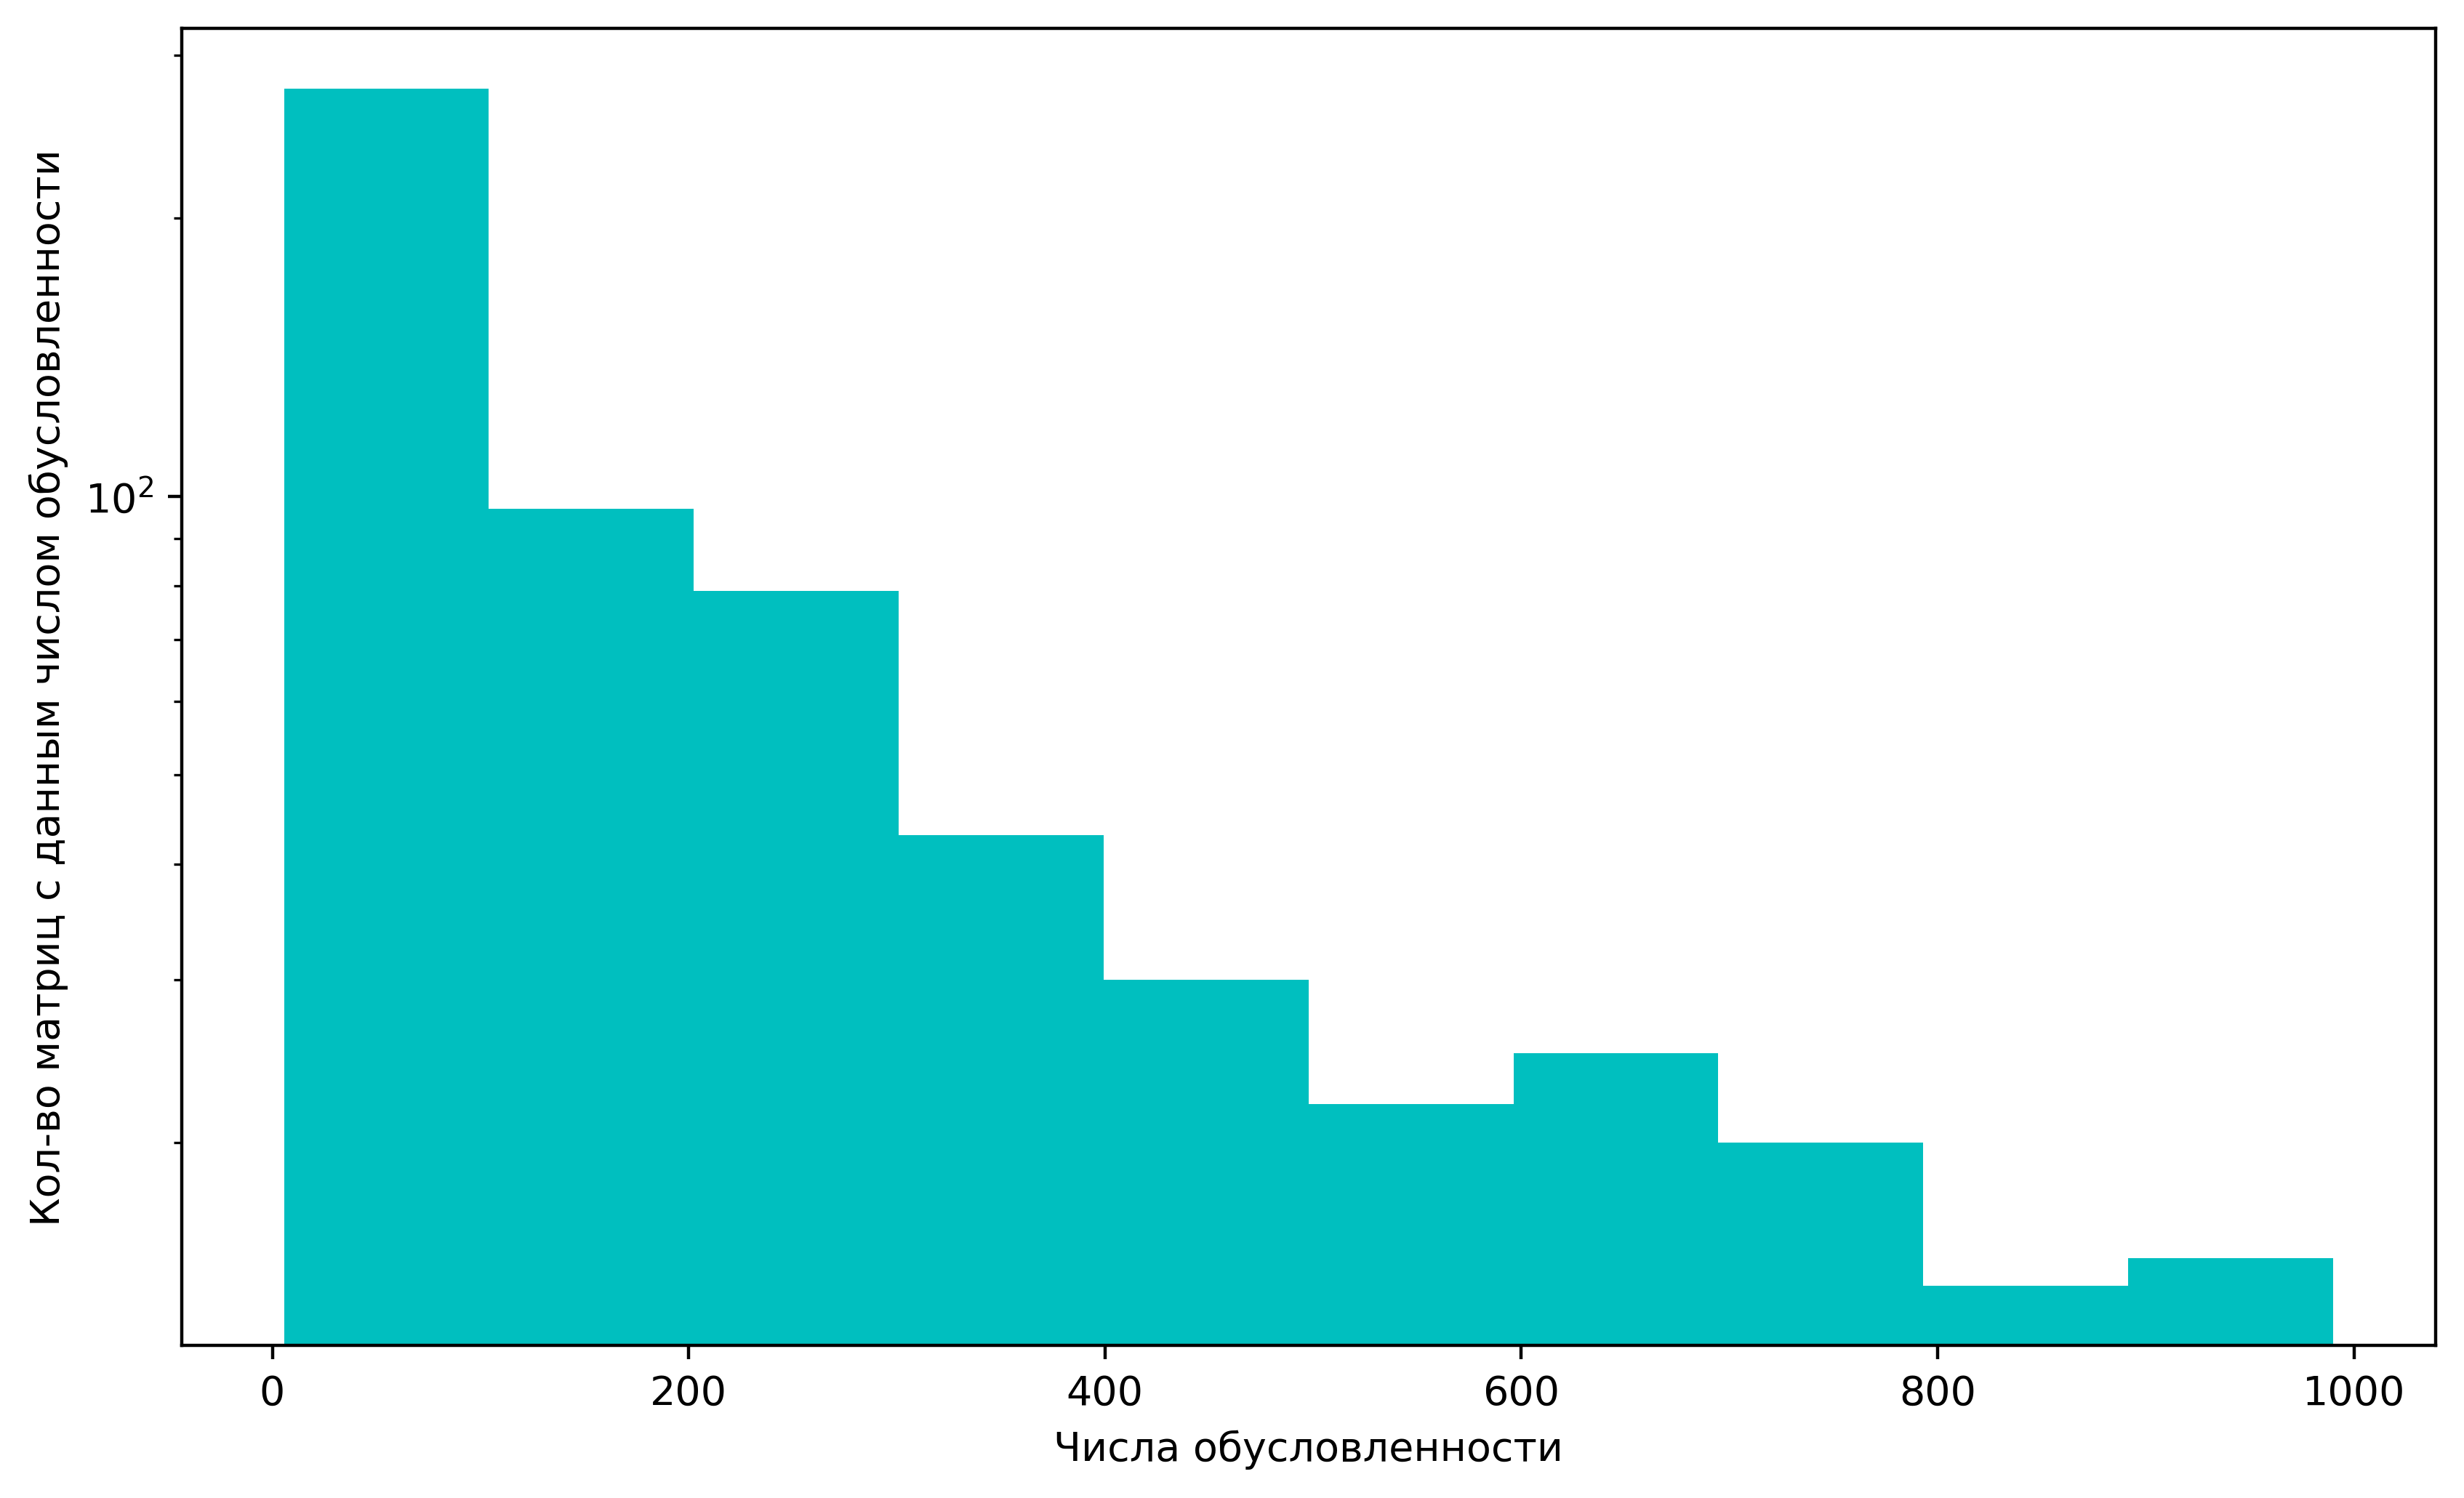

In [26]:
spectral_radii = np.zeros(N)
condition_numbers = np.zeros(N)
for i in range(N):
    spectral_radii[i] = np.max(np.abs(np.linalg.eigvals(positive_definite_matrices[i])))
    condition_numbers[i] = np.linalg.cond(positive_definite_matrices[i])

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)    
plt.hist(spectral_radii, color='m')
plt.ylabel('Кол-во матриц с данным спектральным радиусом')
plt.xlabel('Спектральный радиус')
plt.show() 

_, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)  
plt.hist(condition_numbers[condition_numbers < 1e3], log = True, color='c')
plt.ylabel('Кол-во матриц с данным числом обусловленности')
plt.xlabel('Числа обусловленности')
plt.show()


## Пункт e

In [27]:
def mean_sqrt_error(x_real, x_received):
    return np.sqrt(np.sum((x_real - x_received) ** 2)) / np.sqrt(np.sum(x_real ** 2))

def supreme_error(x_real, x_received):
    return np.amax(np.abs(x_real - x_received)) / np.amax(np.abs(x_real))

In [29]:
def show_error(default_method, matrices):
    b = np.array([1, 1, 1, 1], dtype=np.float32).reshape((4, 1))
    N = 1000
    solution_correct = []
    solution_default = []
    for i in range(N):
        solution_correct.append(gauss(matrices[i], b, True))
        solution_default.append(default_method(matrices[i], b))

    mse = []
    se = []
    for i in range(N):
        mse.append(mean_sqrt_error(solution_correct[i], solution_default[i]))
        se.append(supreme_error(solution_correct[i], solution_default[i]))

    _, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)    
    plt.hist(mse, color='m', log=True)
    plt.ylabel('Кол-во решений')
    plt.xlabel('Относительная погрешность метода по умолчанию в $L_2$')
    plt.show()

    _, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), dpi=400)    
    plt.hist(se, color='m', log=True)
    plt.ylabel('Кол-во решений')
    plt.xlabel('Относительная погрешность метода по умолчанию в $L_{\infty}$')
    plt.show()

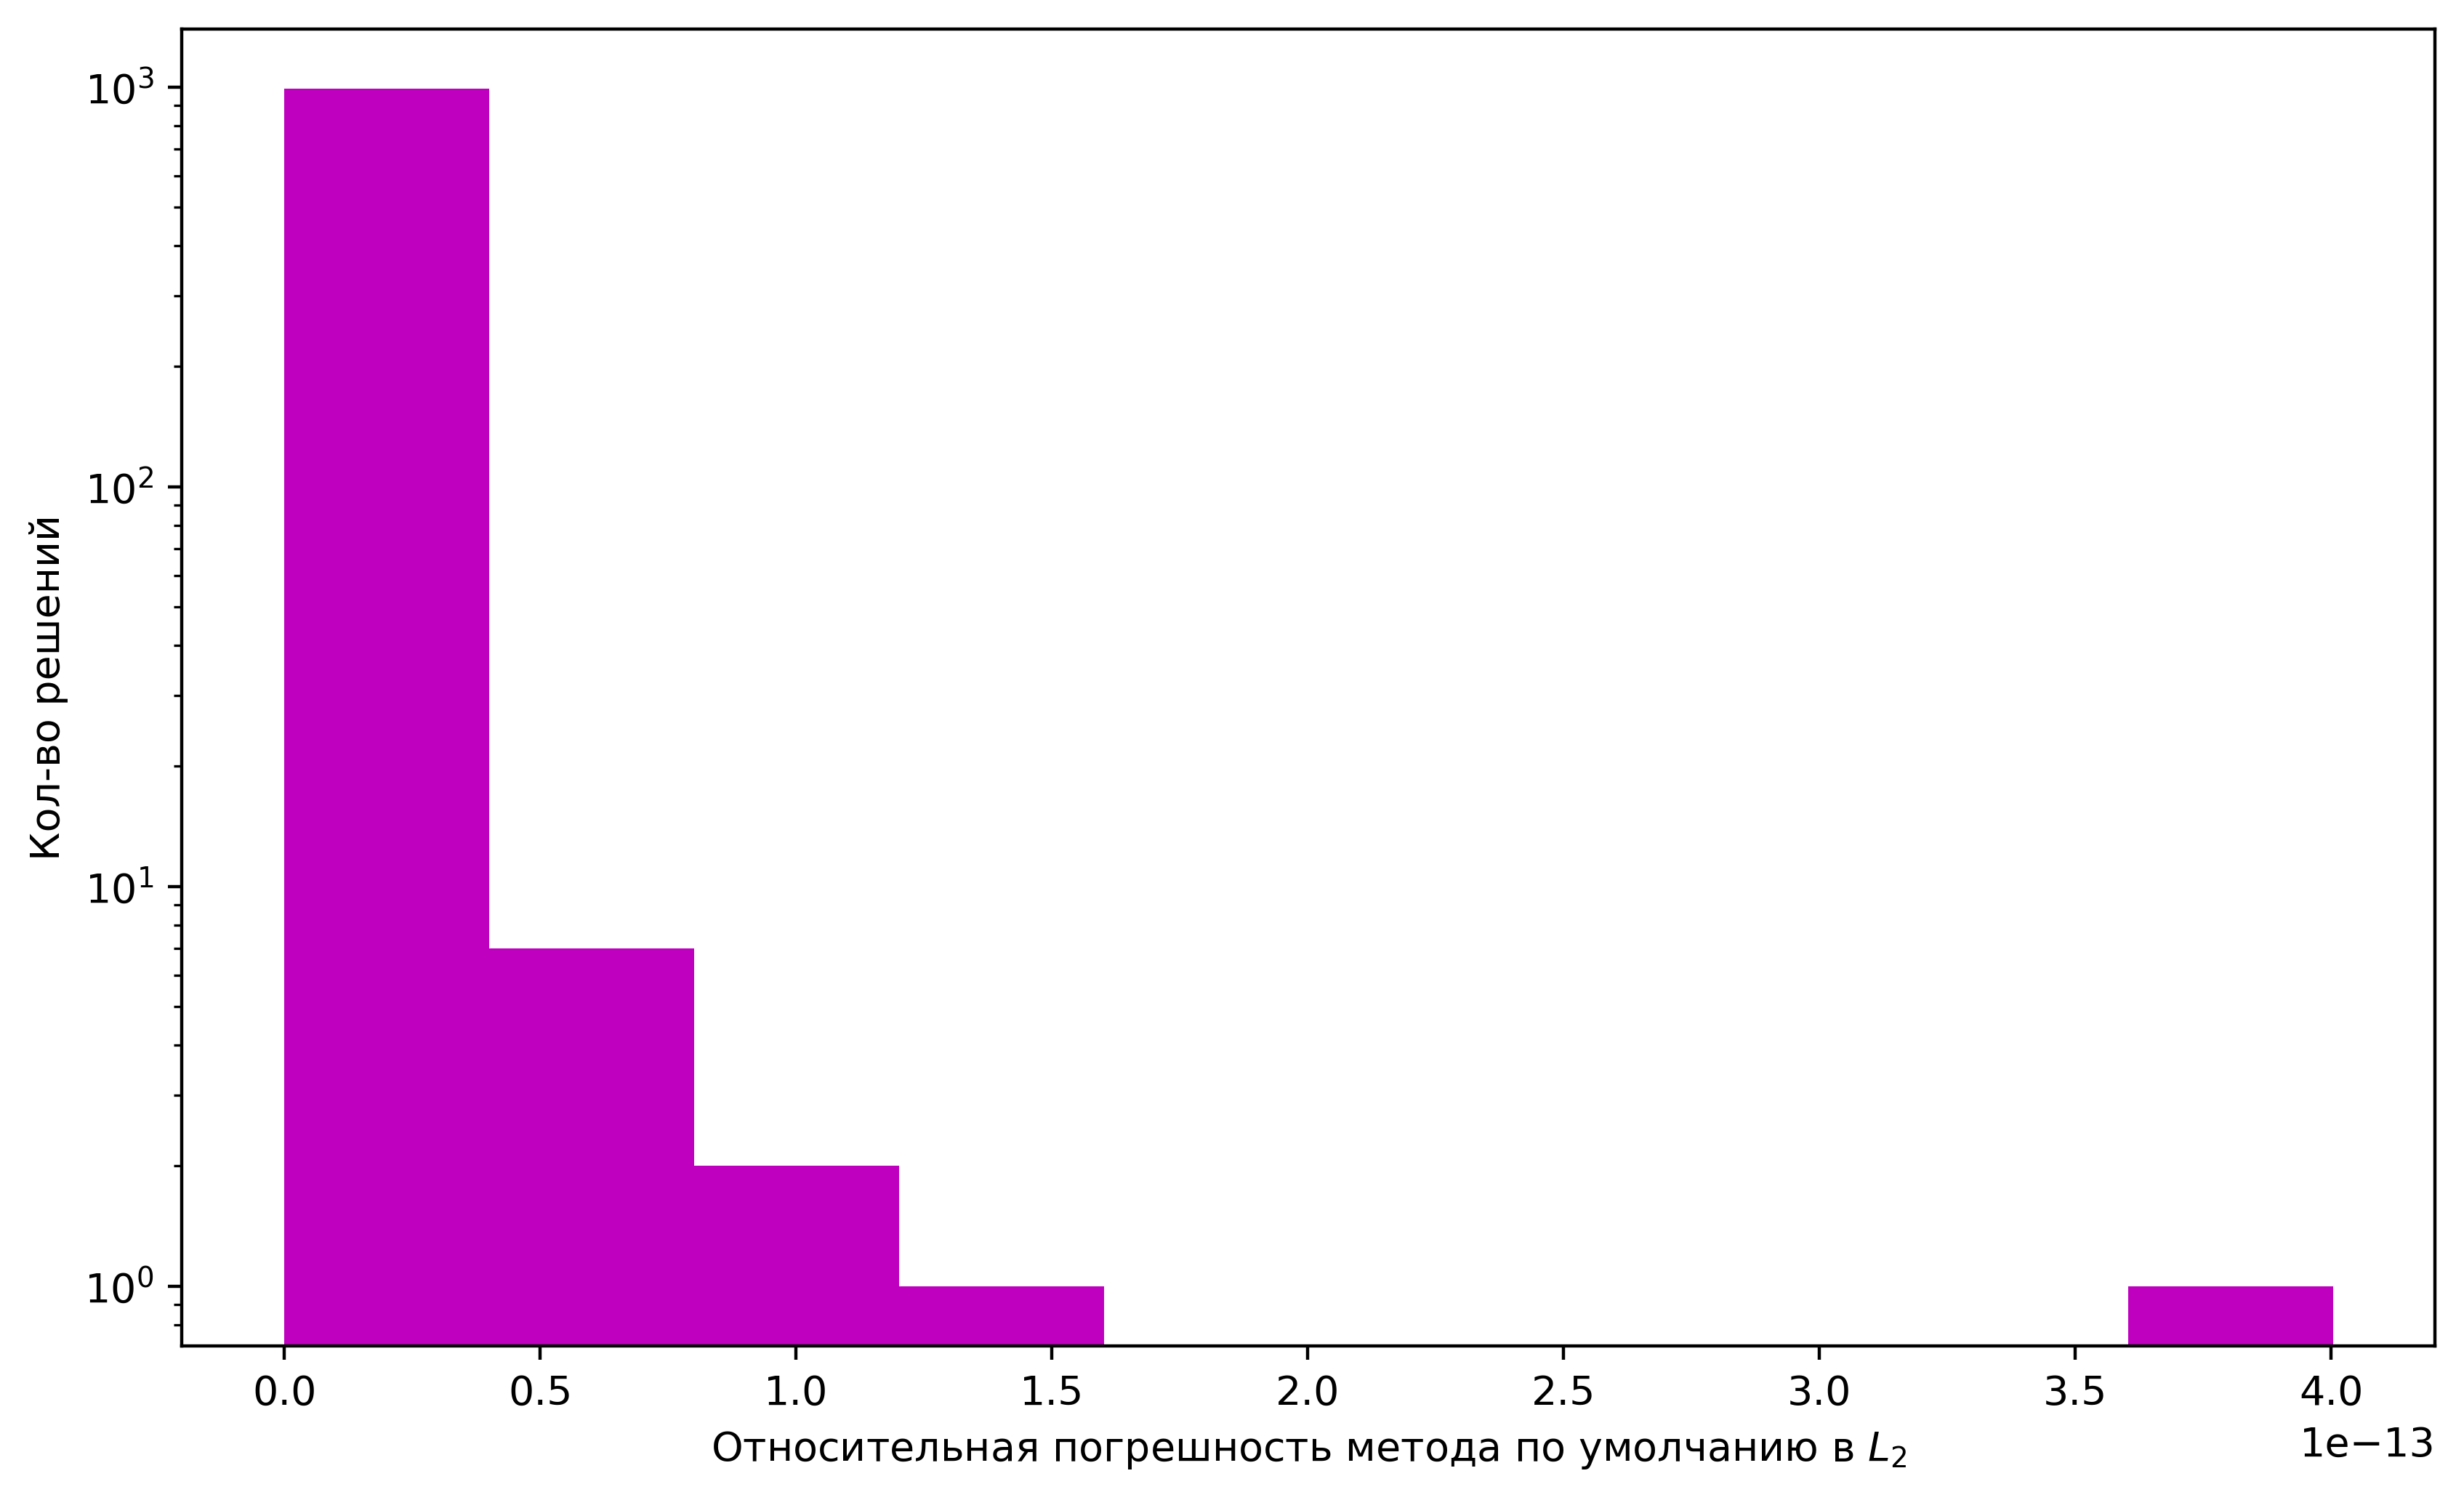

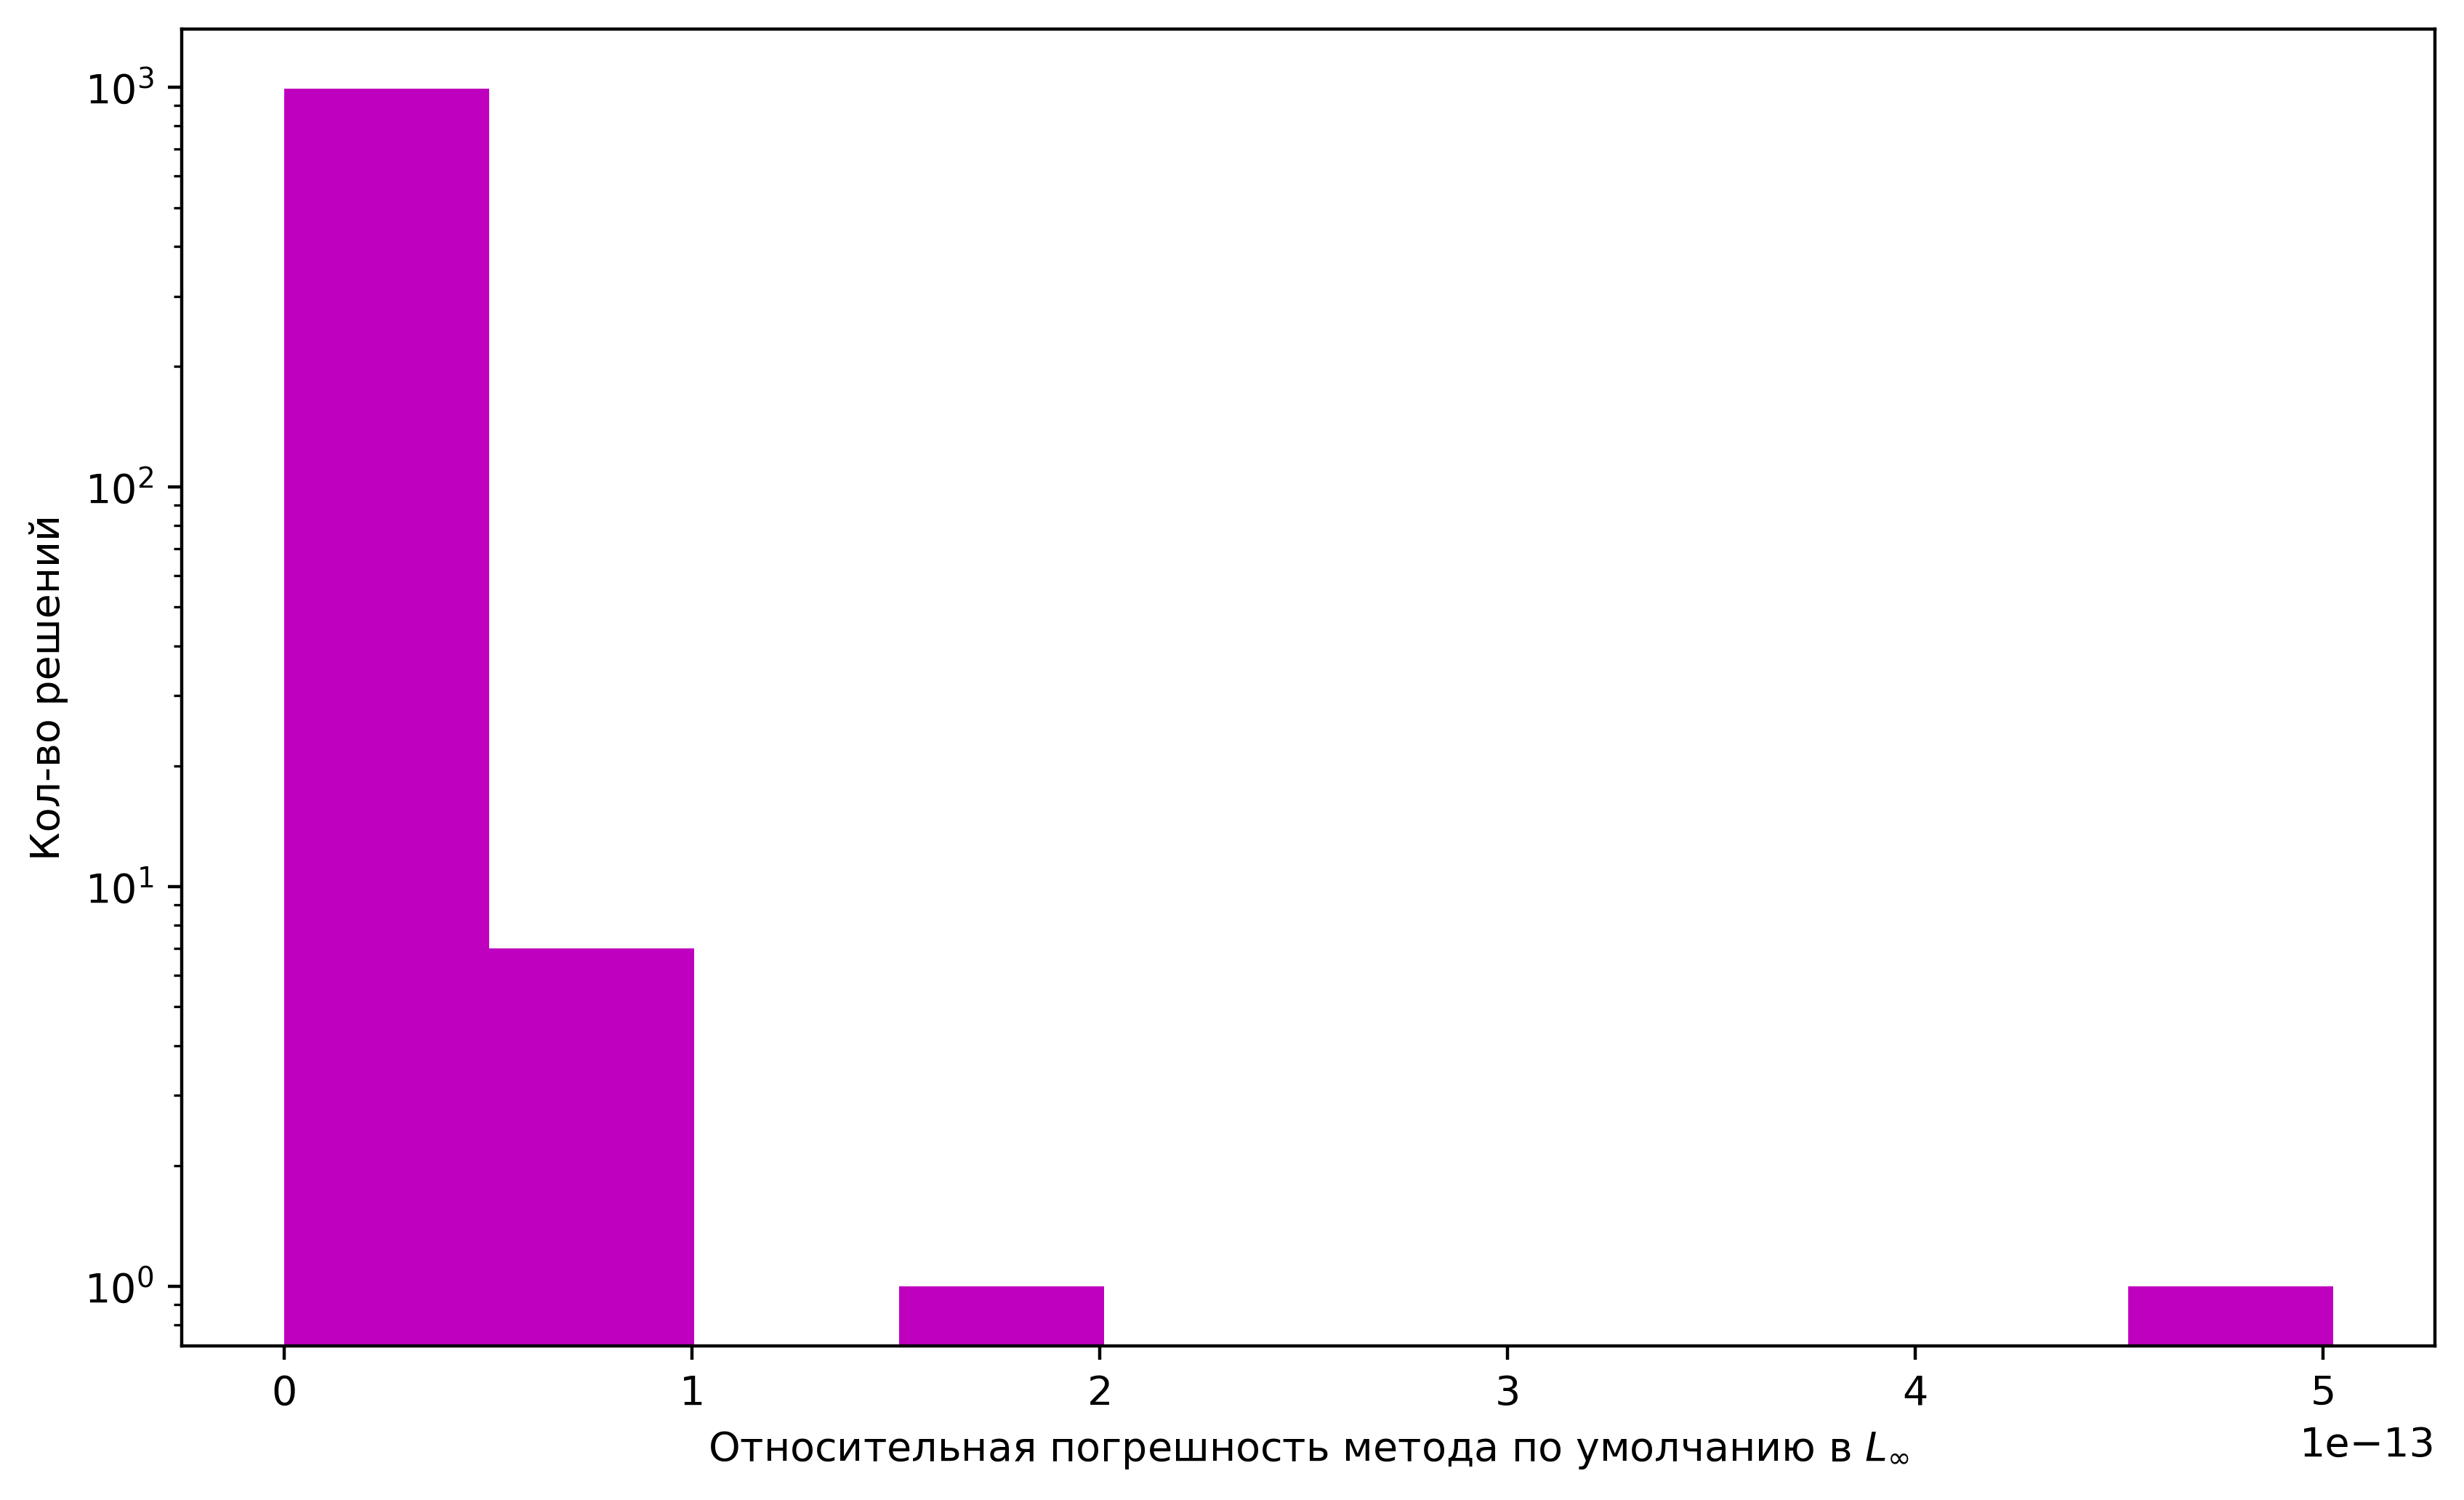

In [30]:
show_error(lambda A, b: gauss(A, b, False), general_matrices)

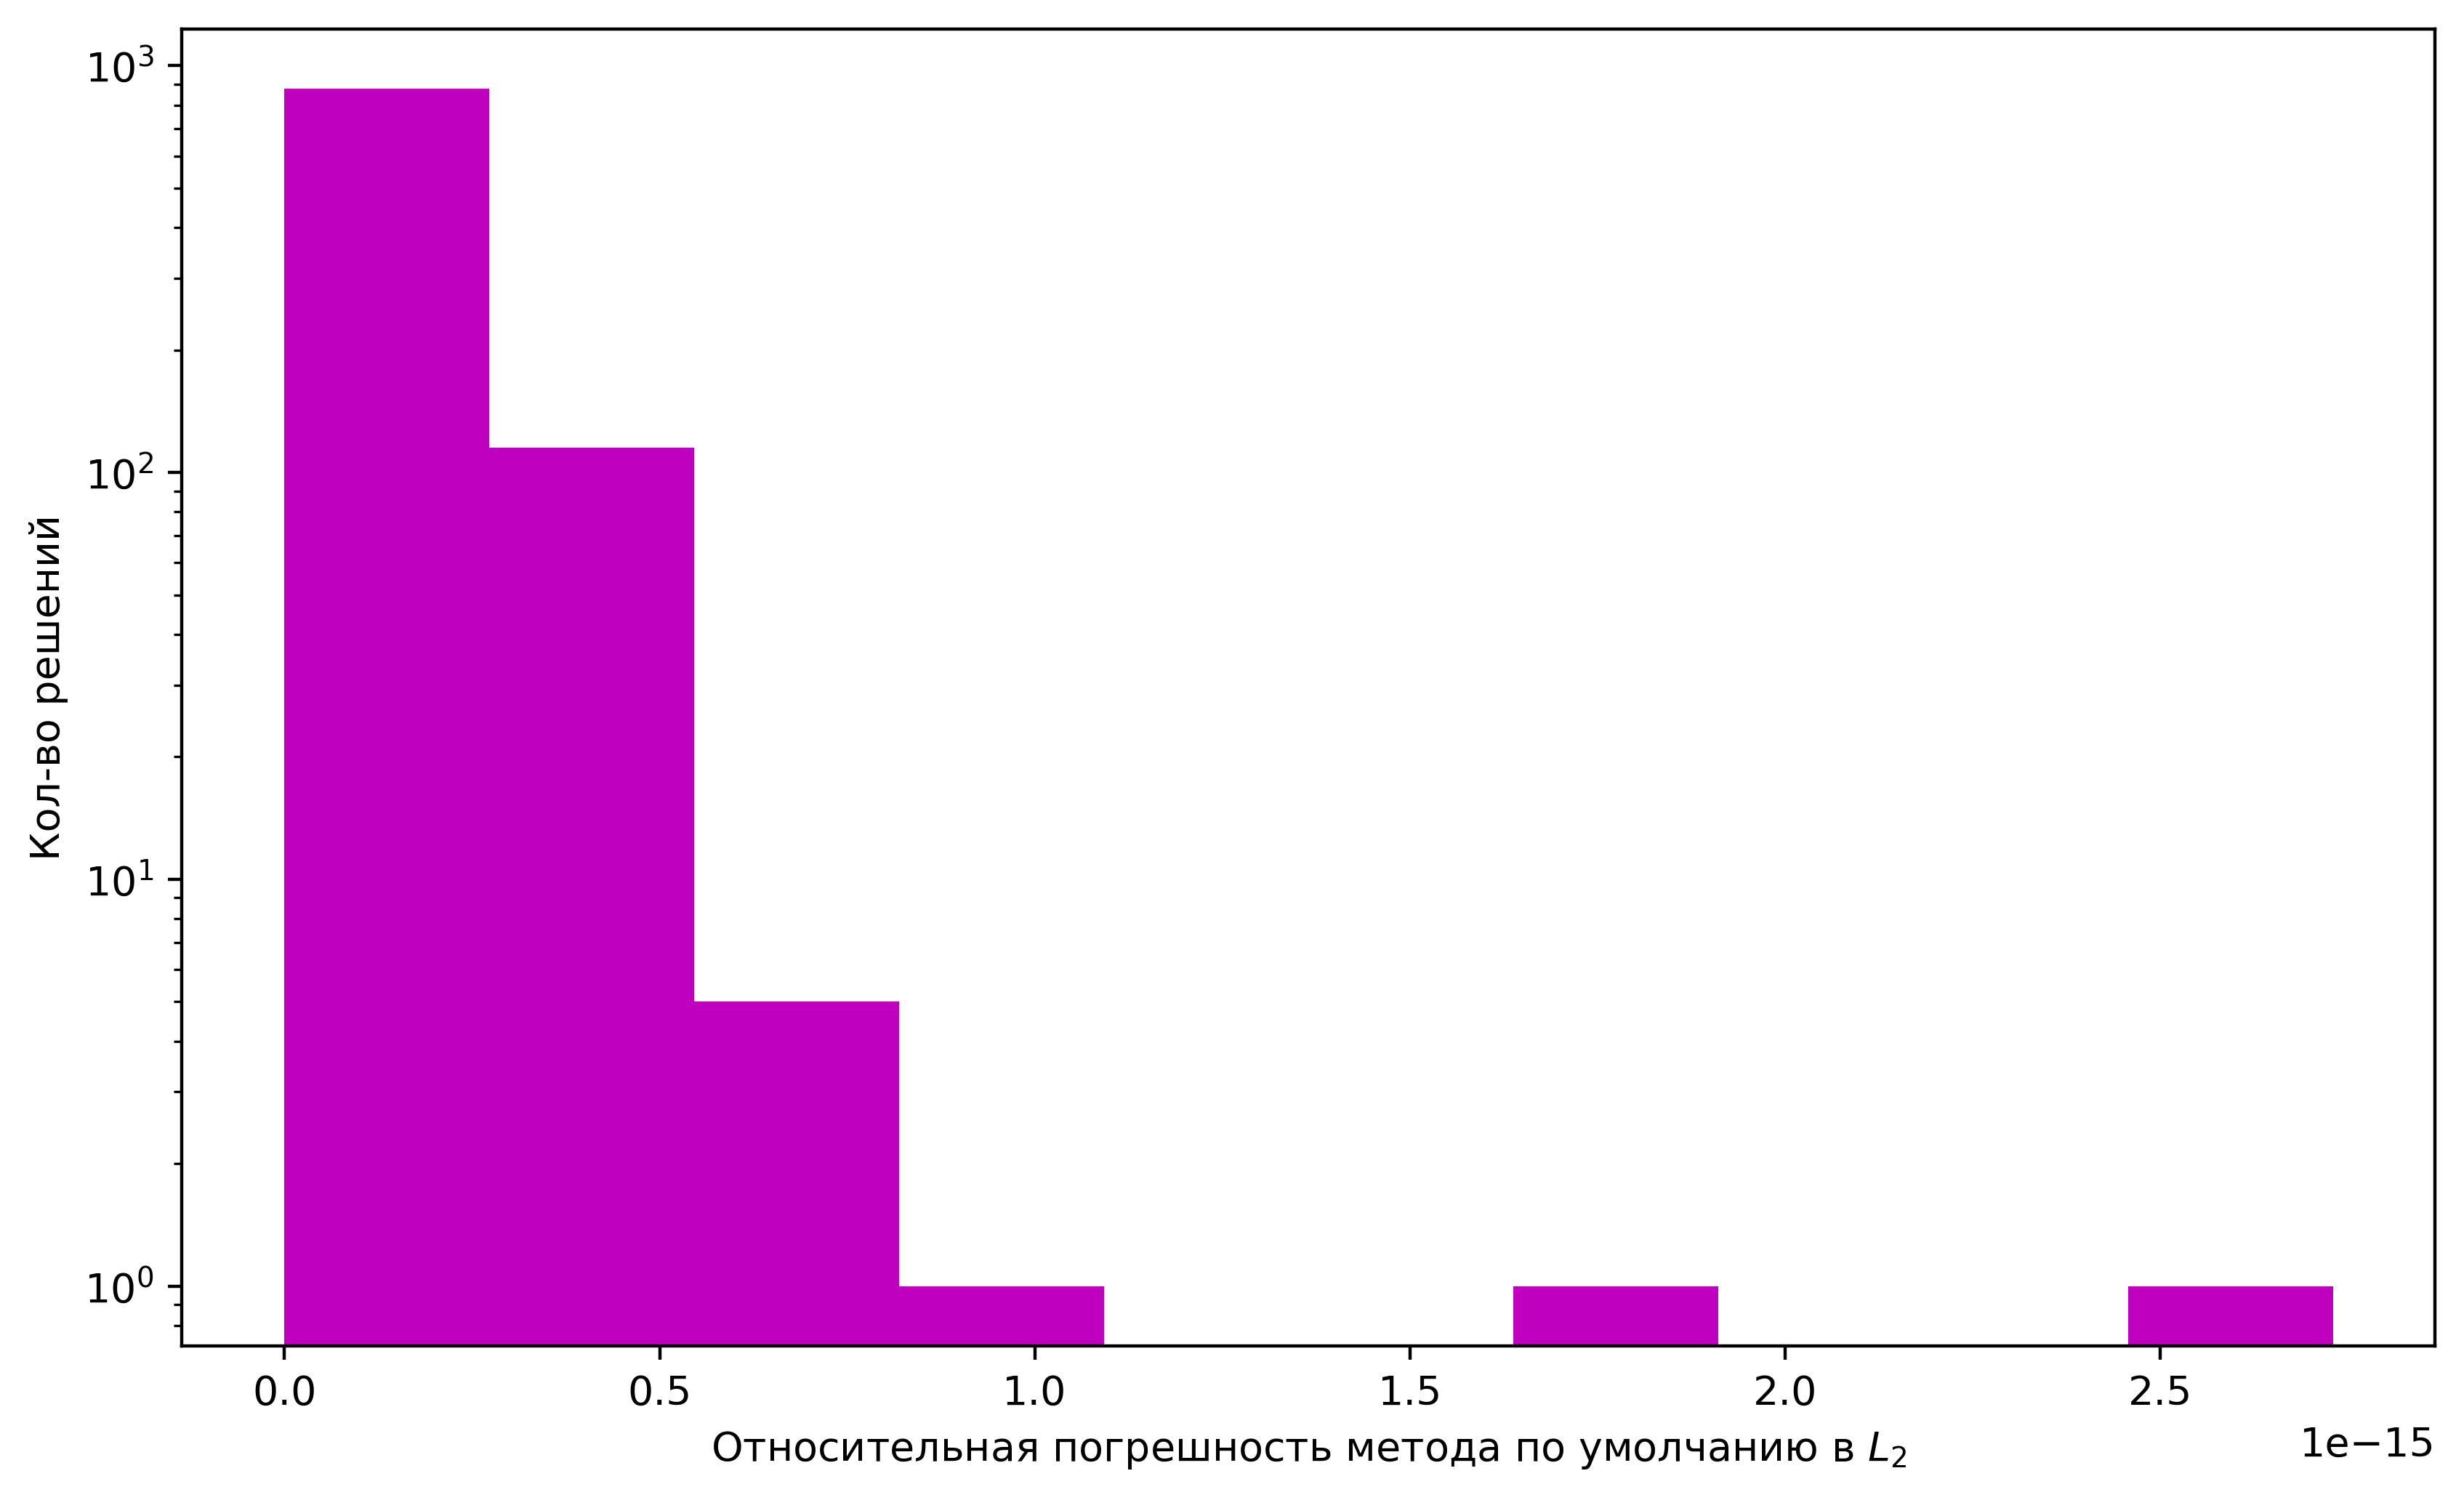

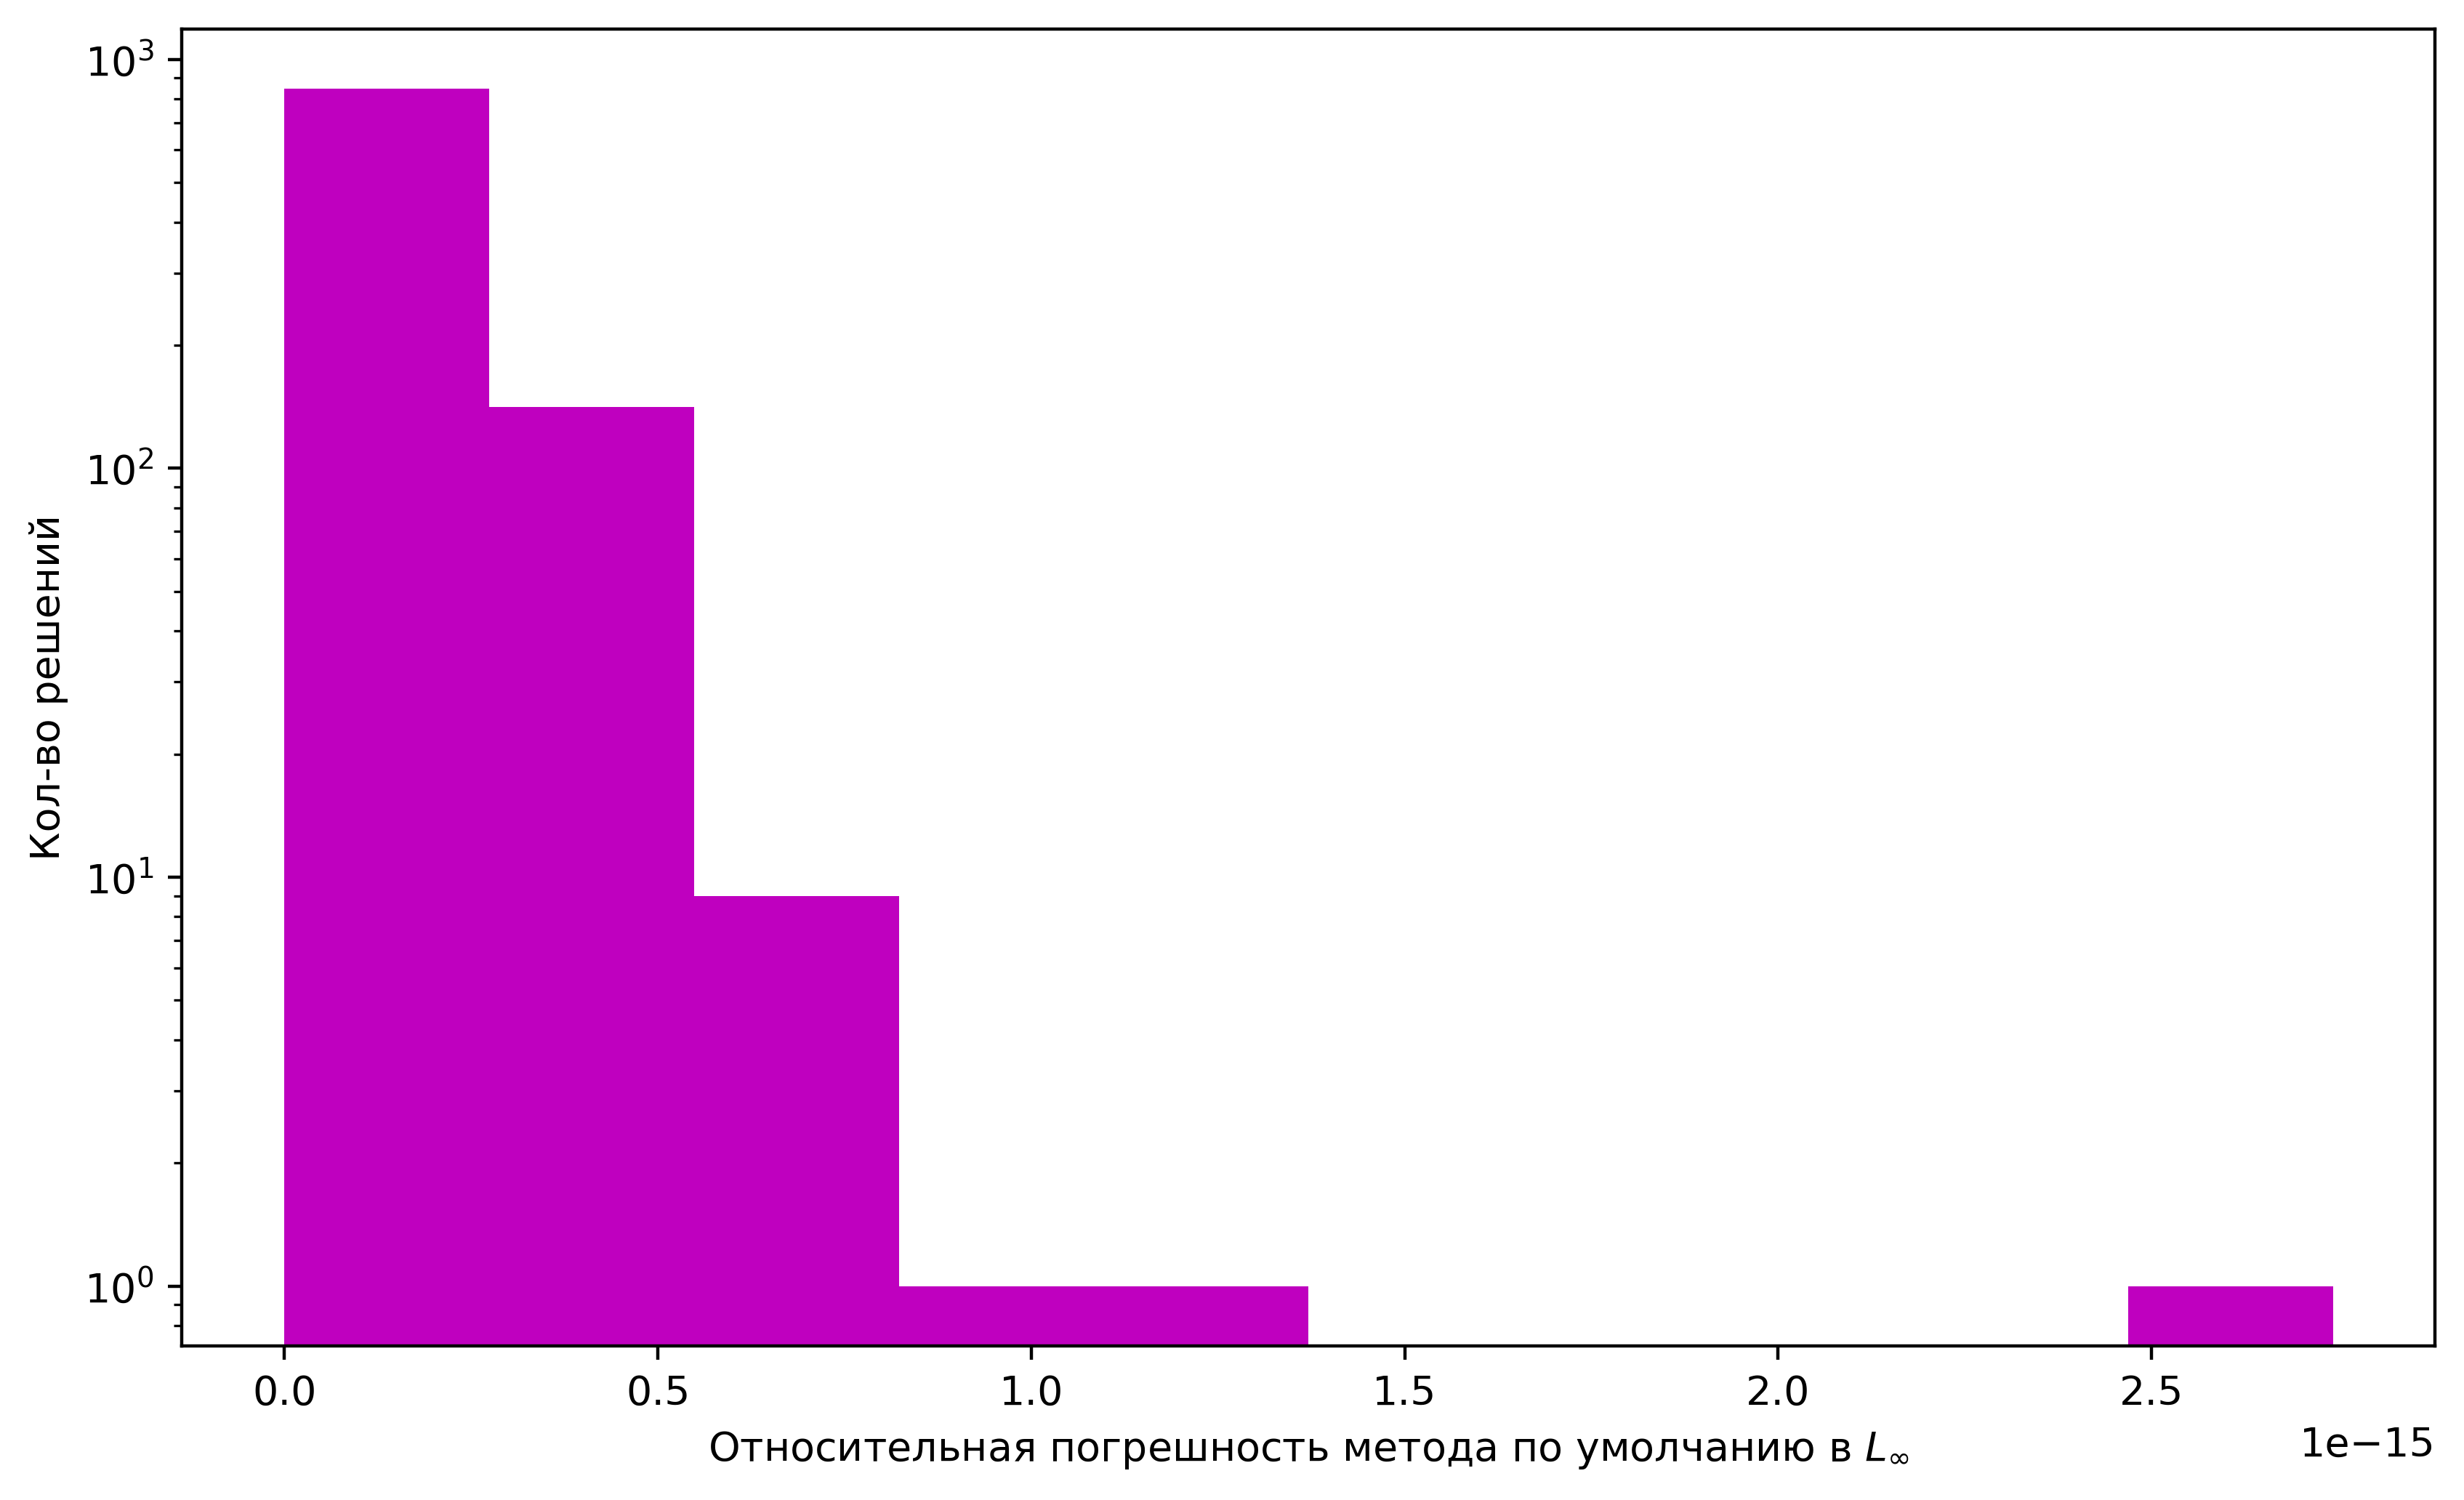

In [31]:
show_error(lambda A, b: gauss(A, b, False), diagonal_dominance_matrices)

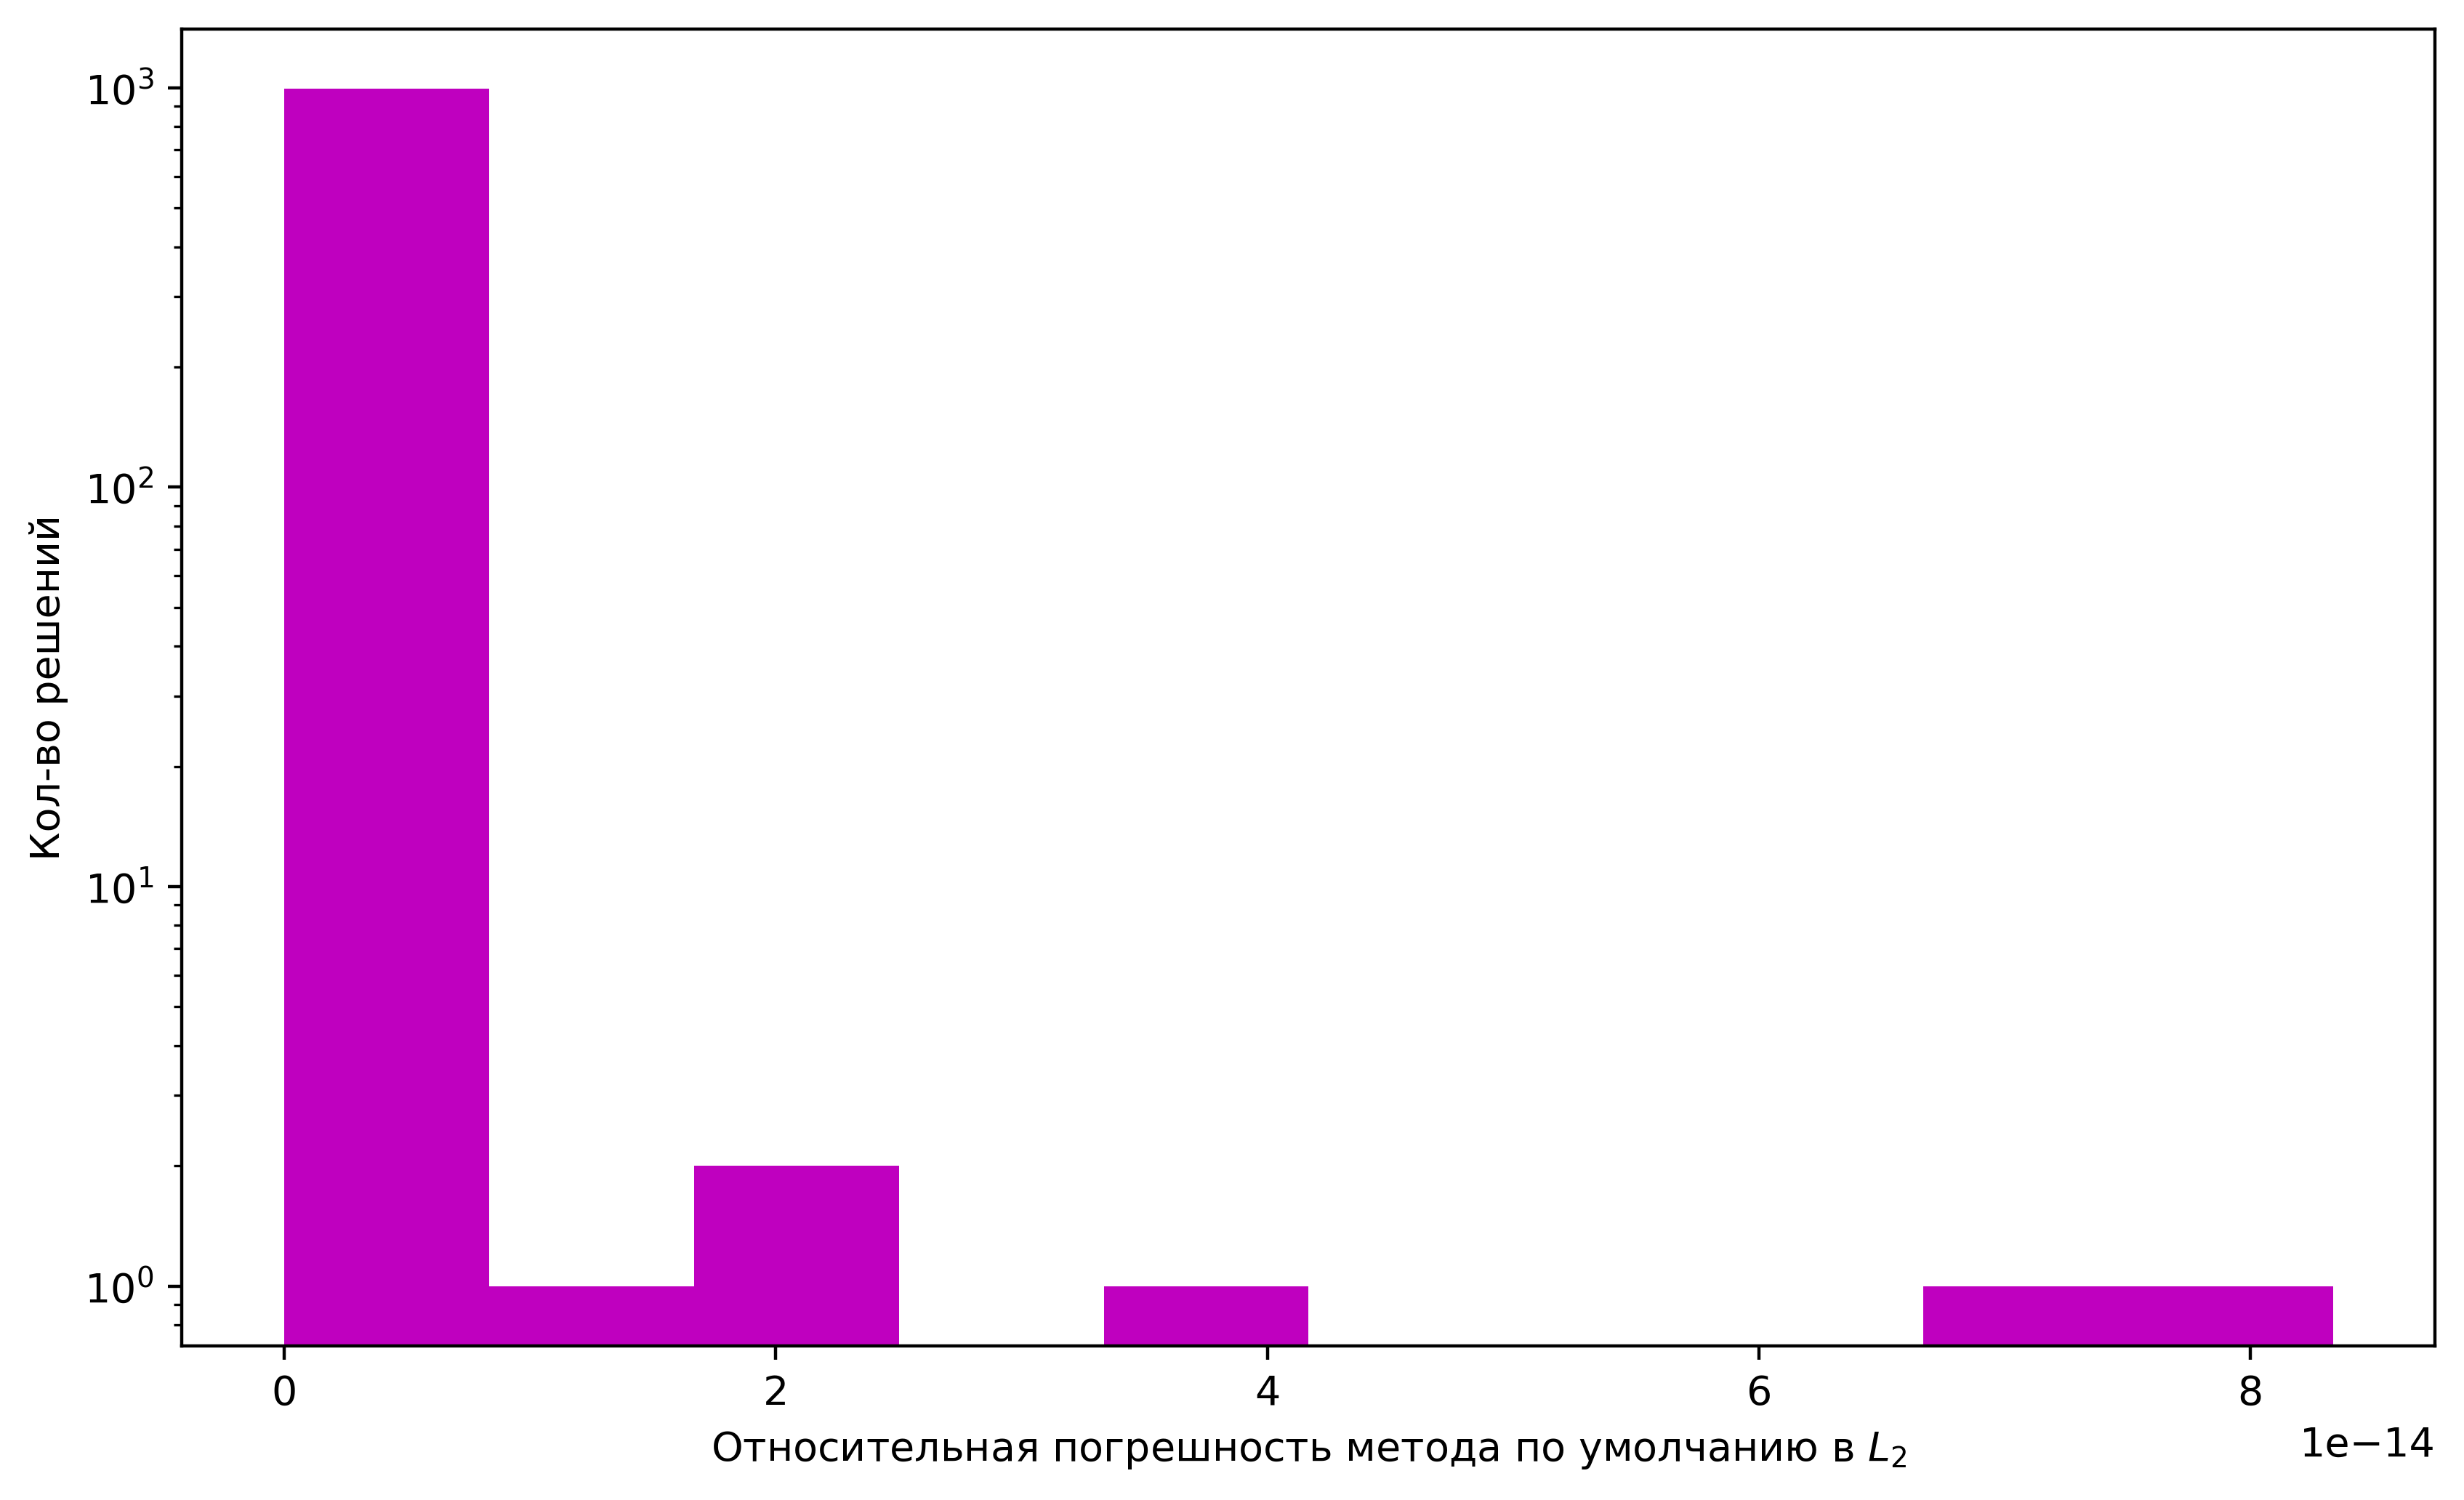

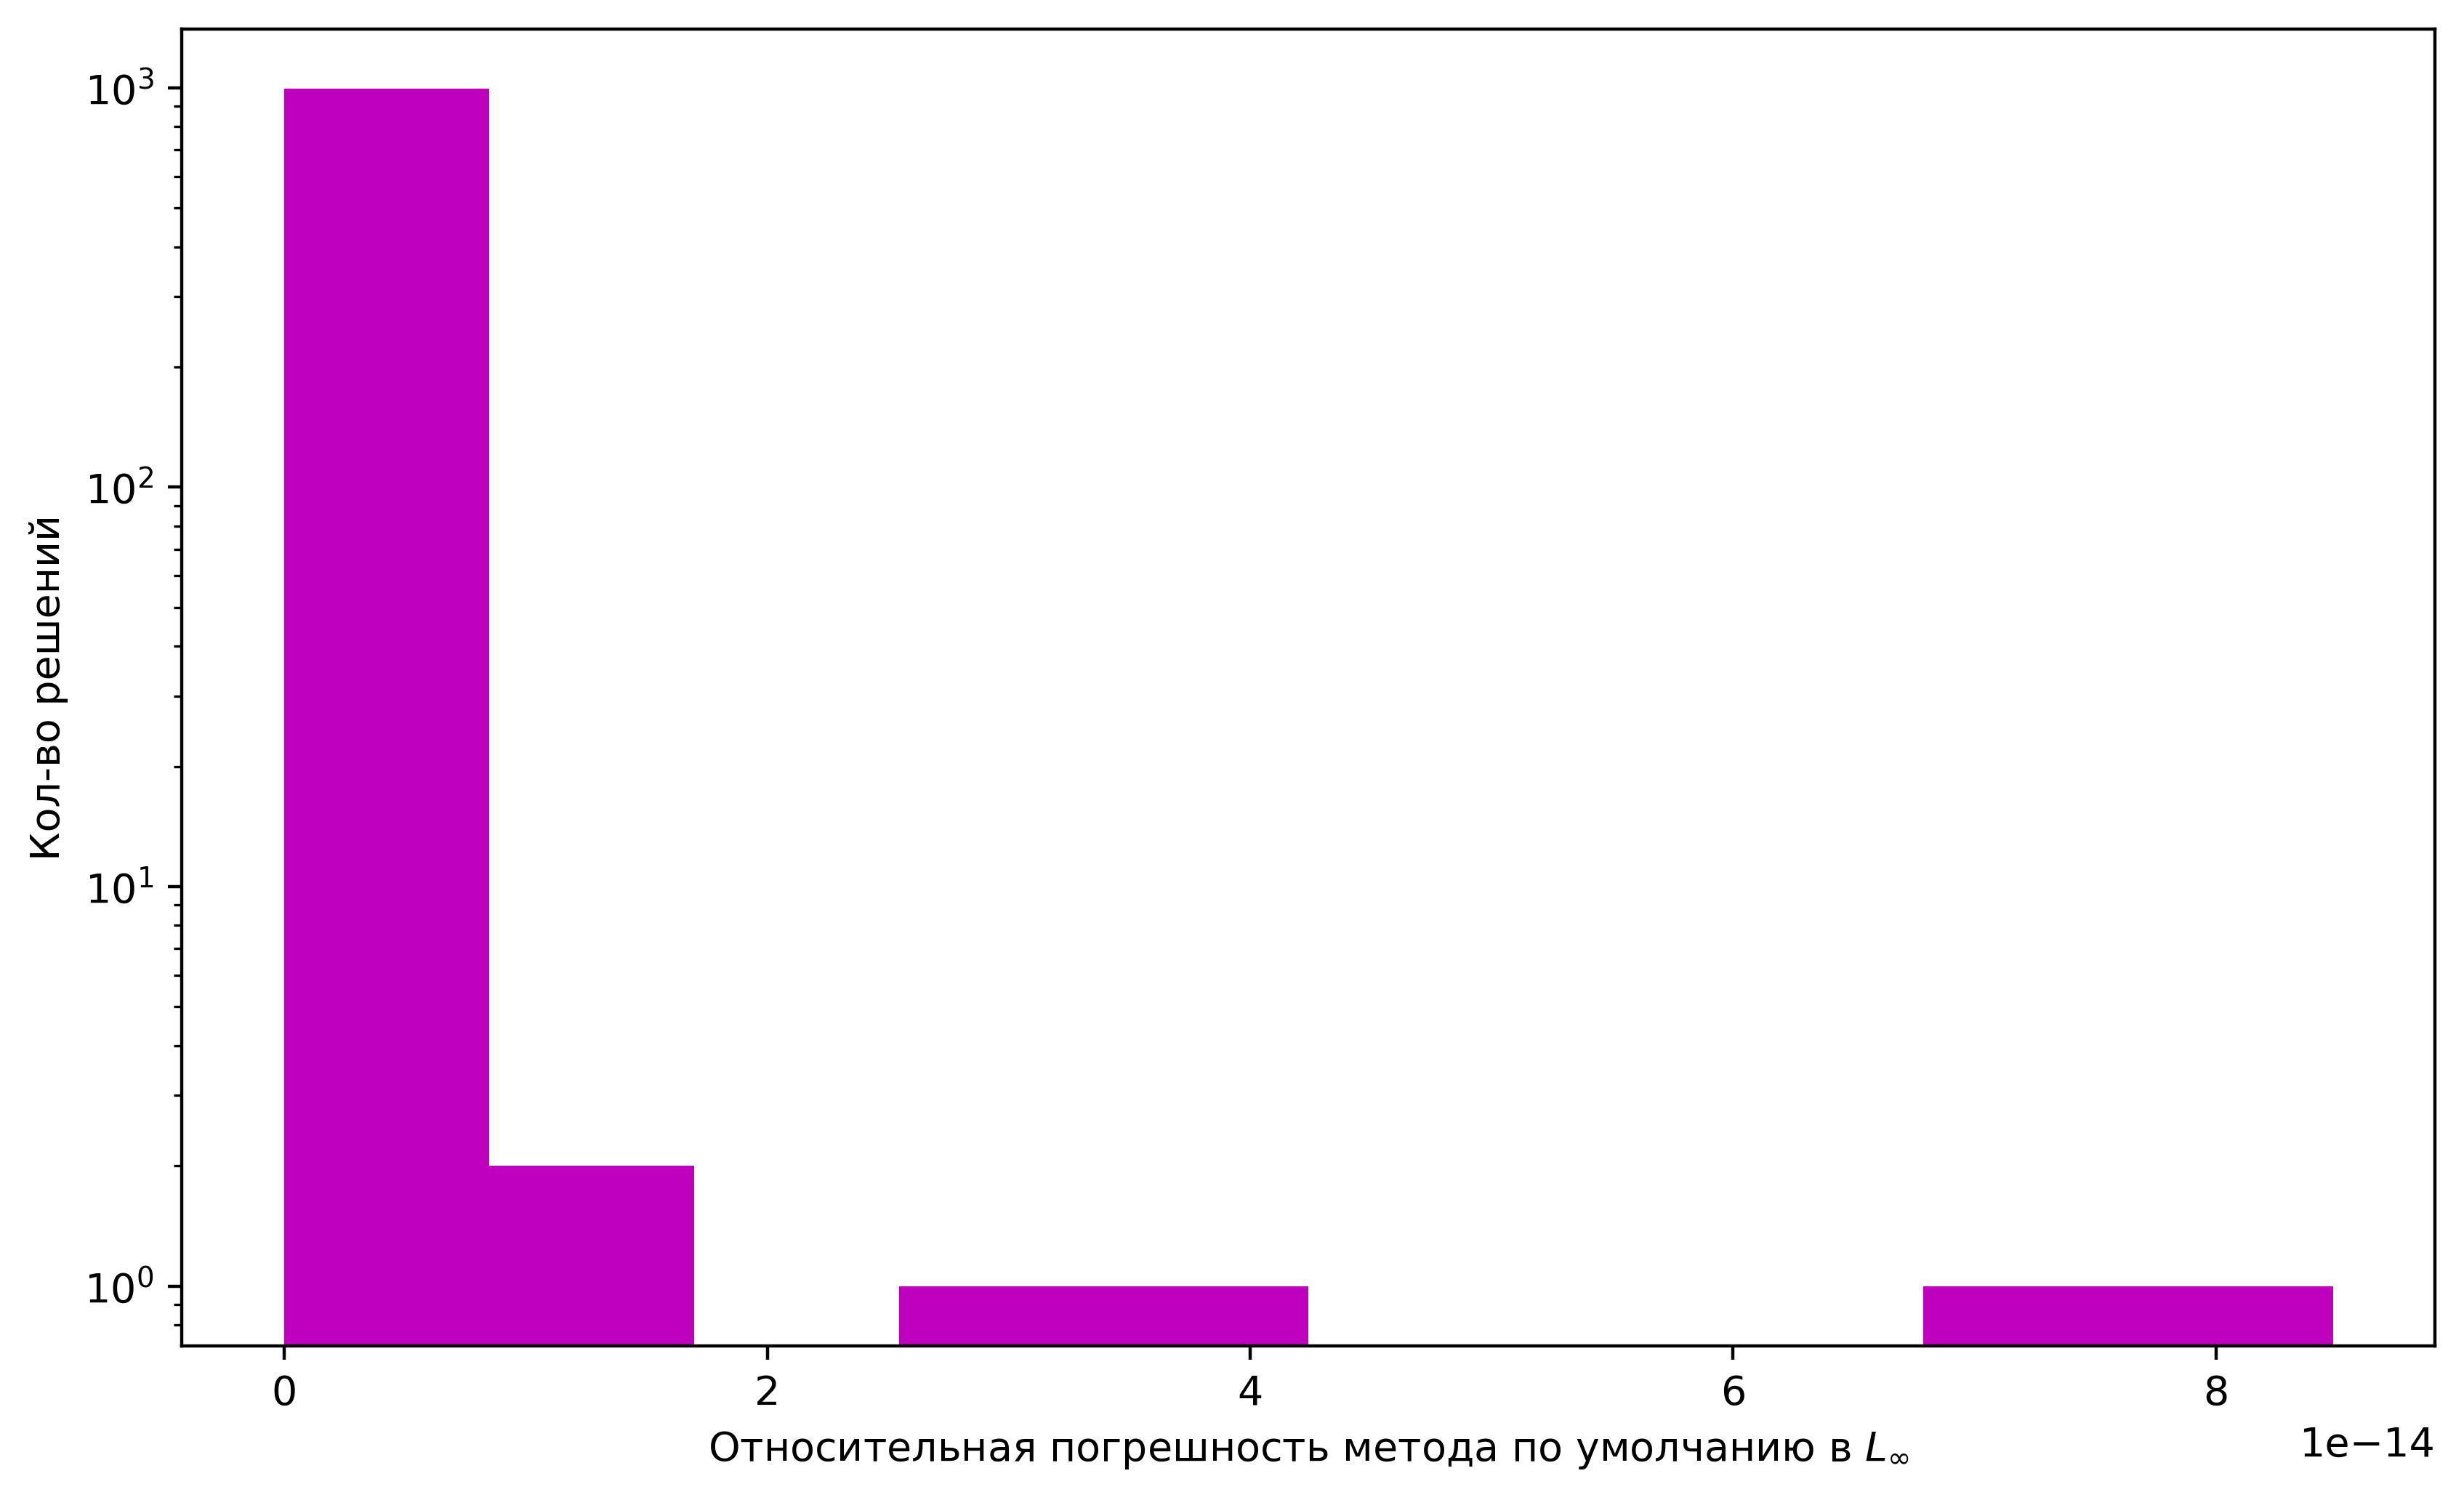

In [32]:
show_error(thomas, tridiagonal_matrices)

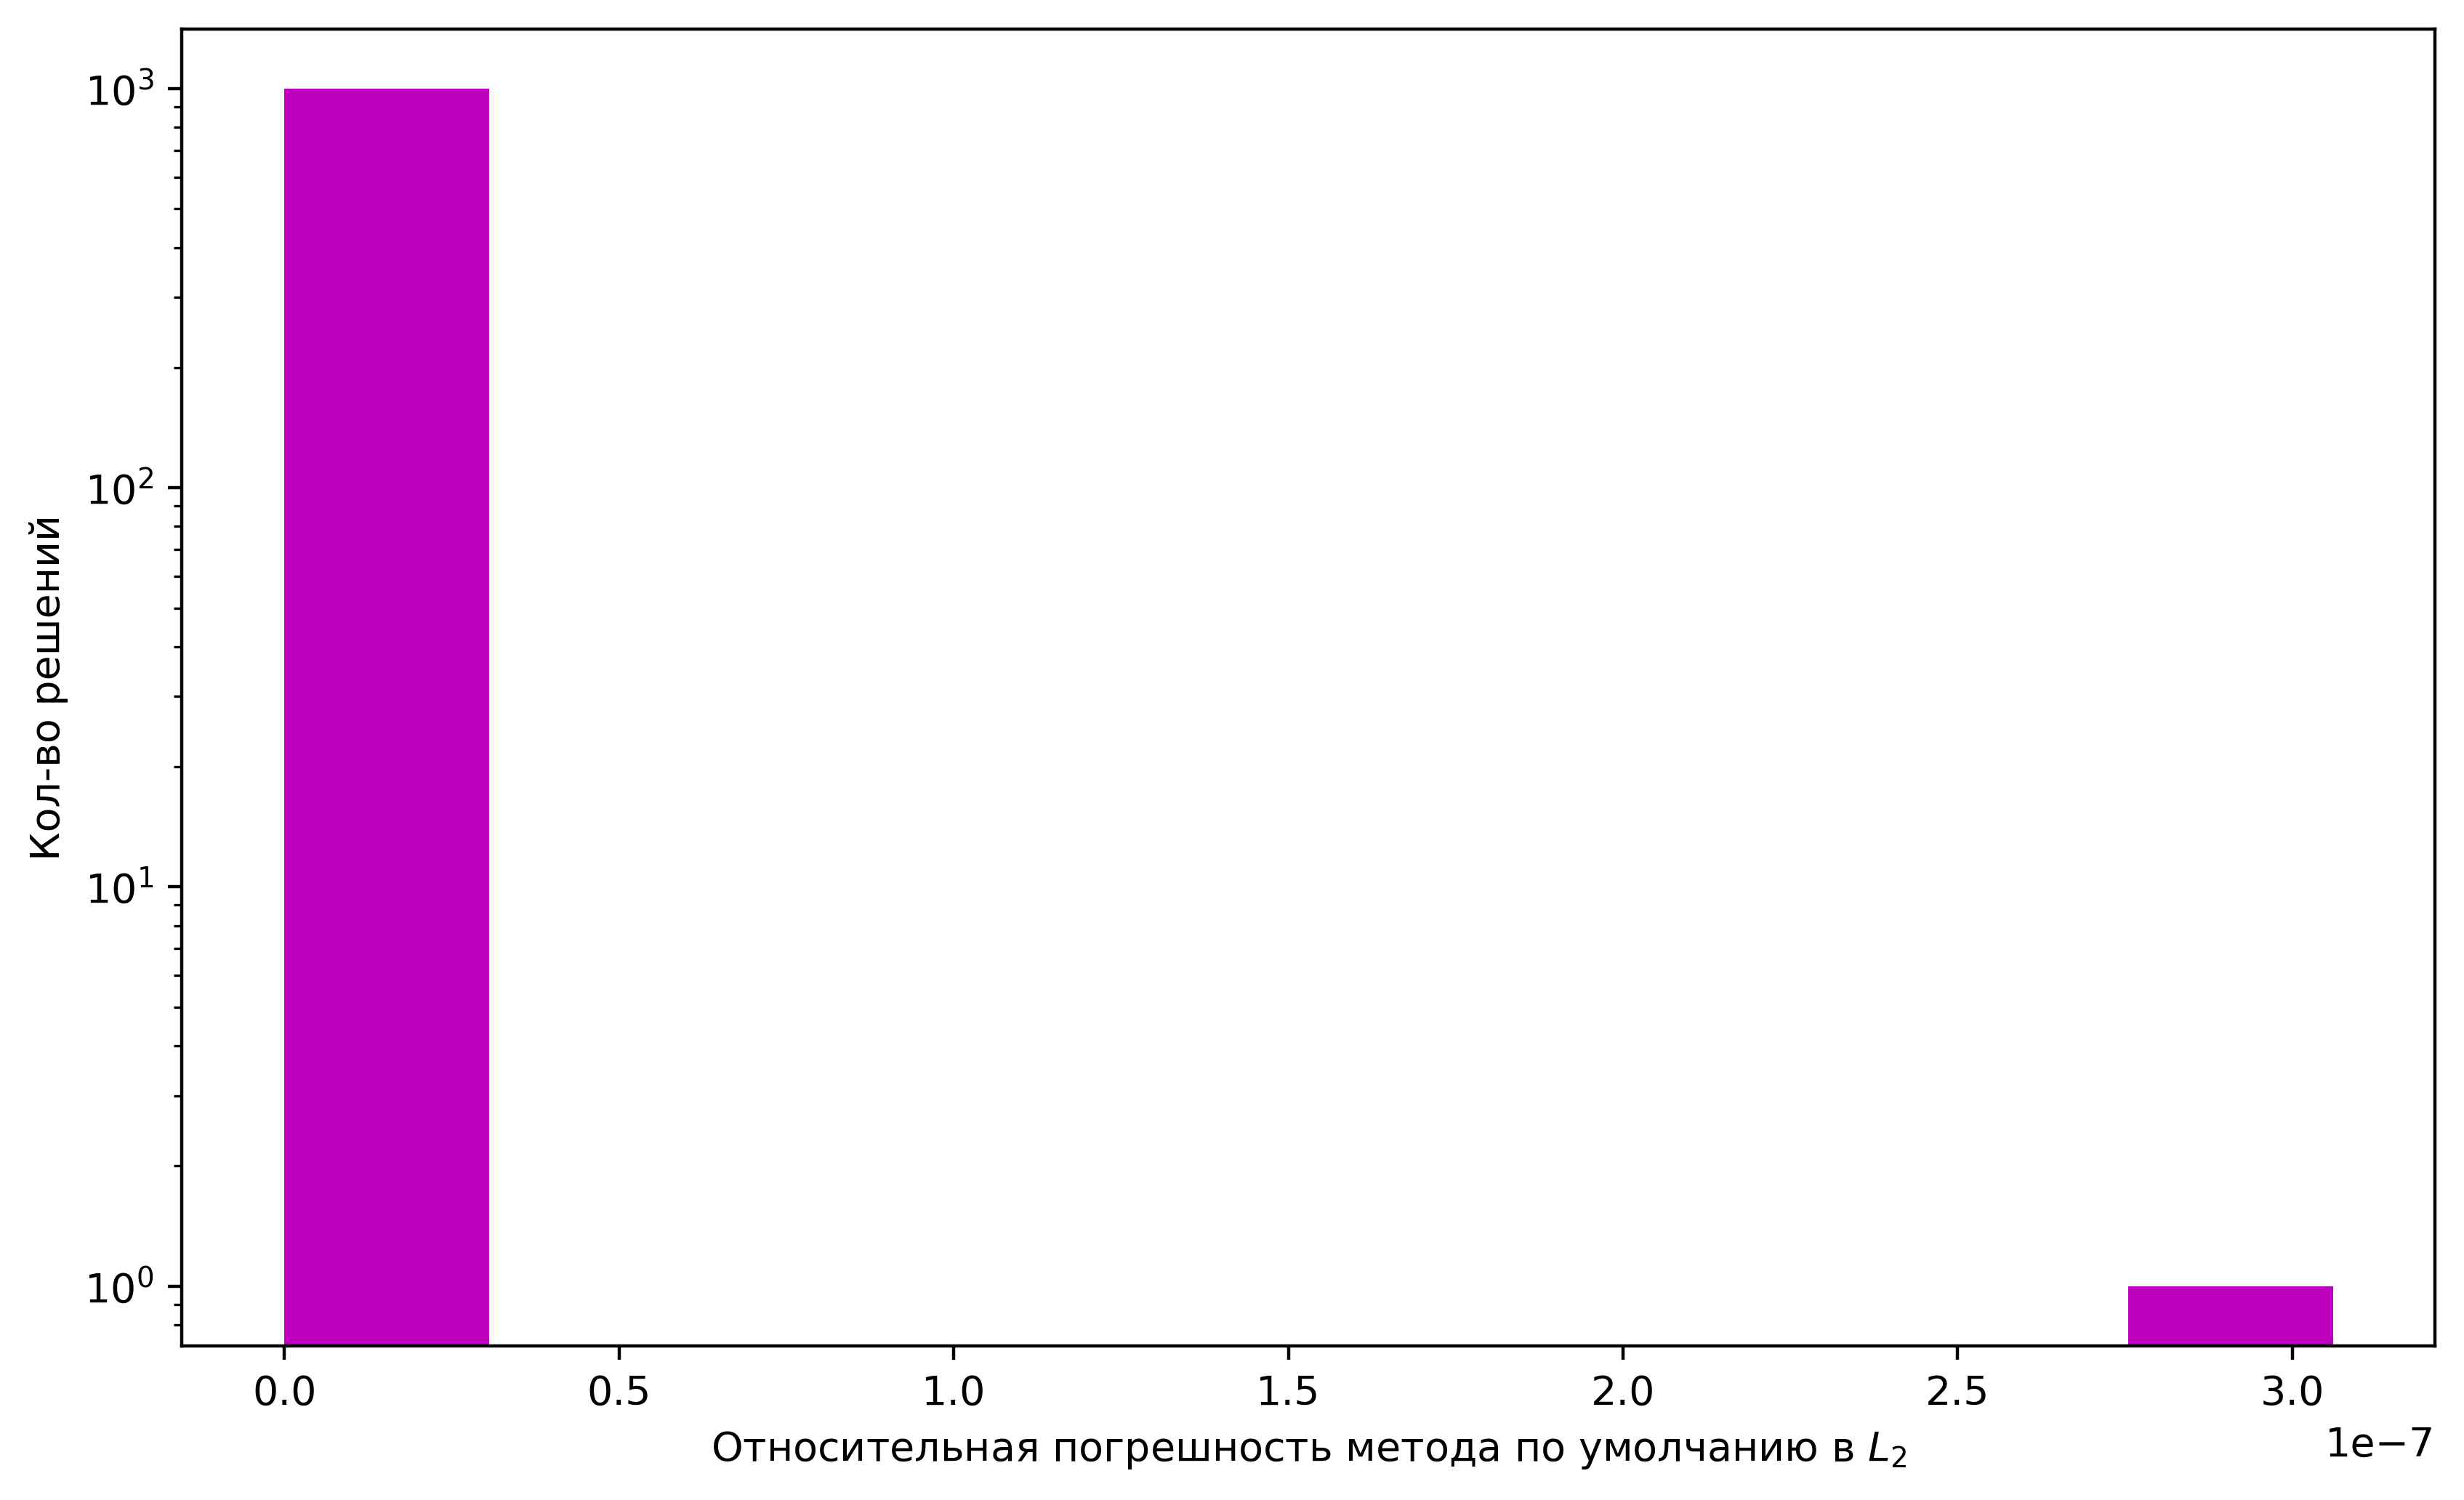

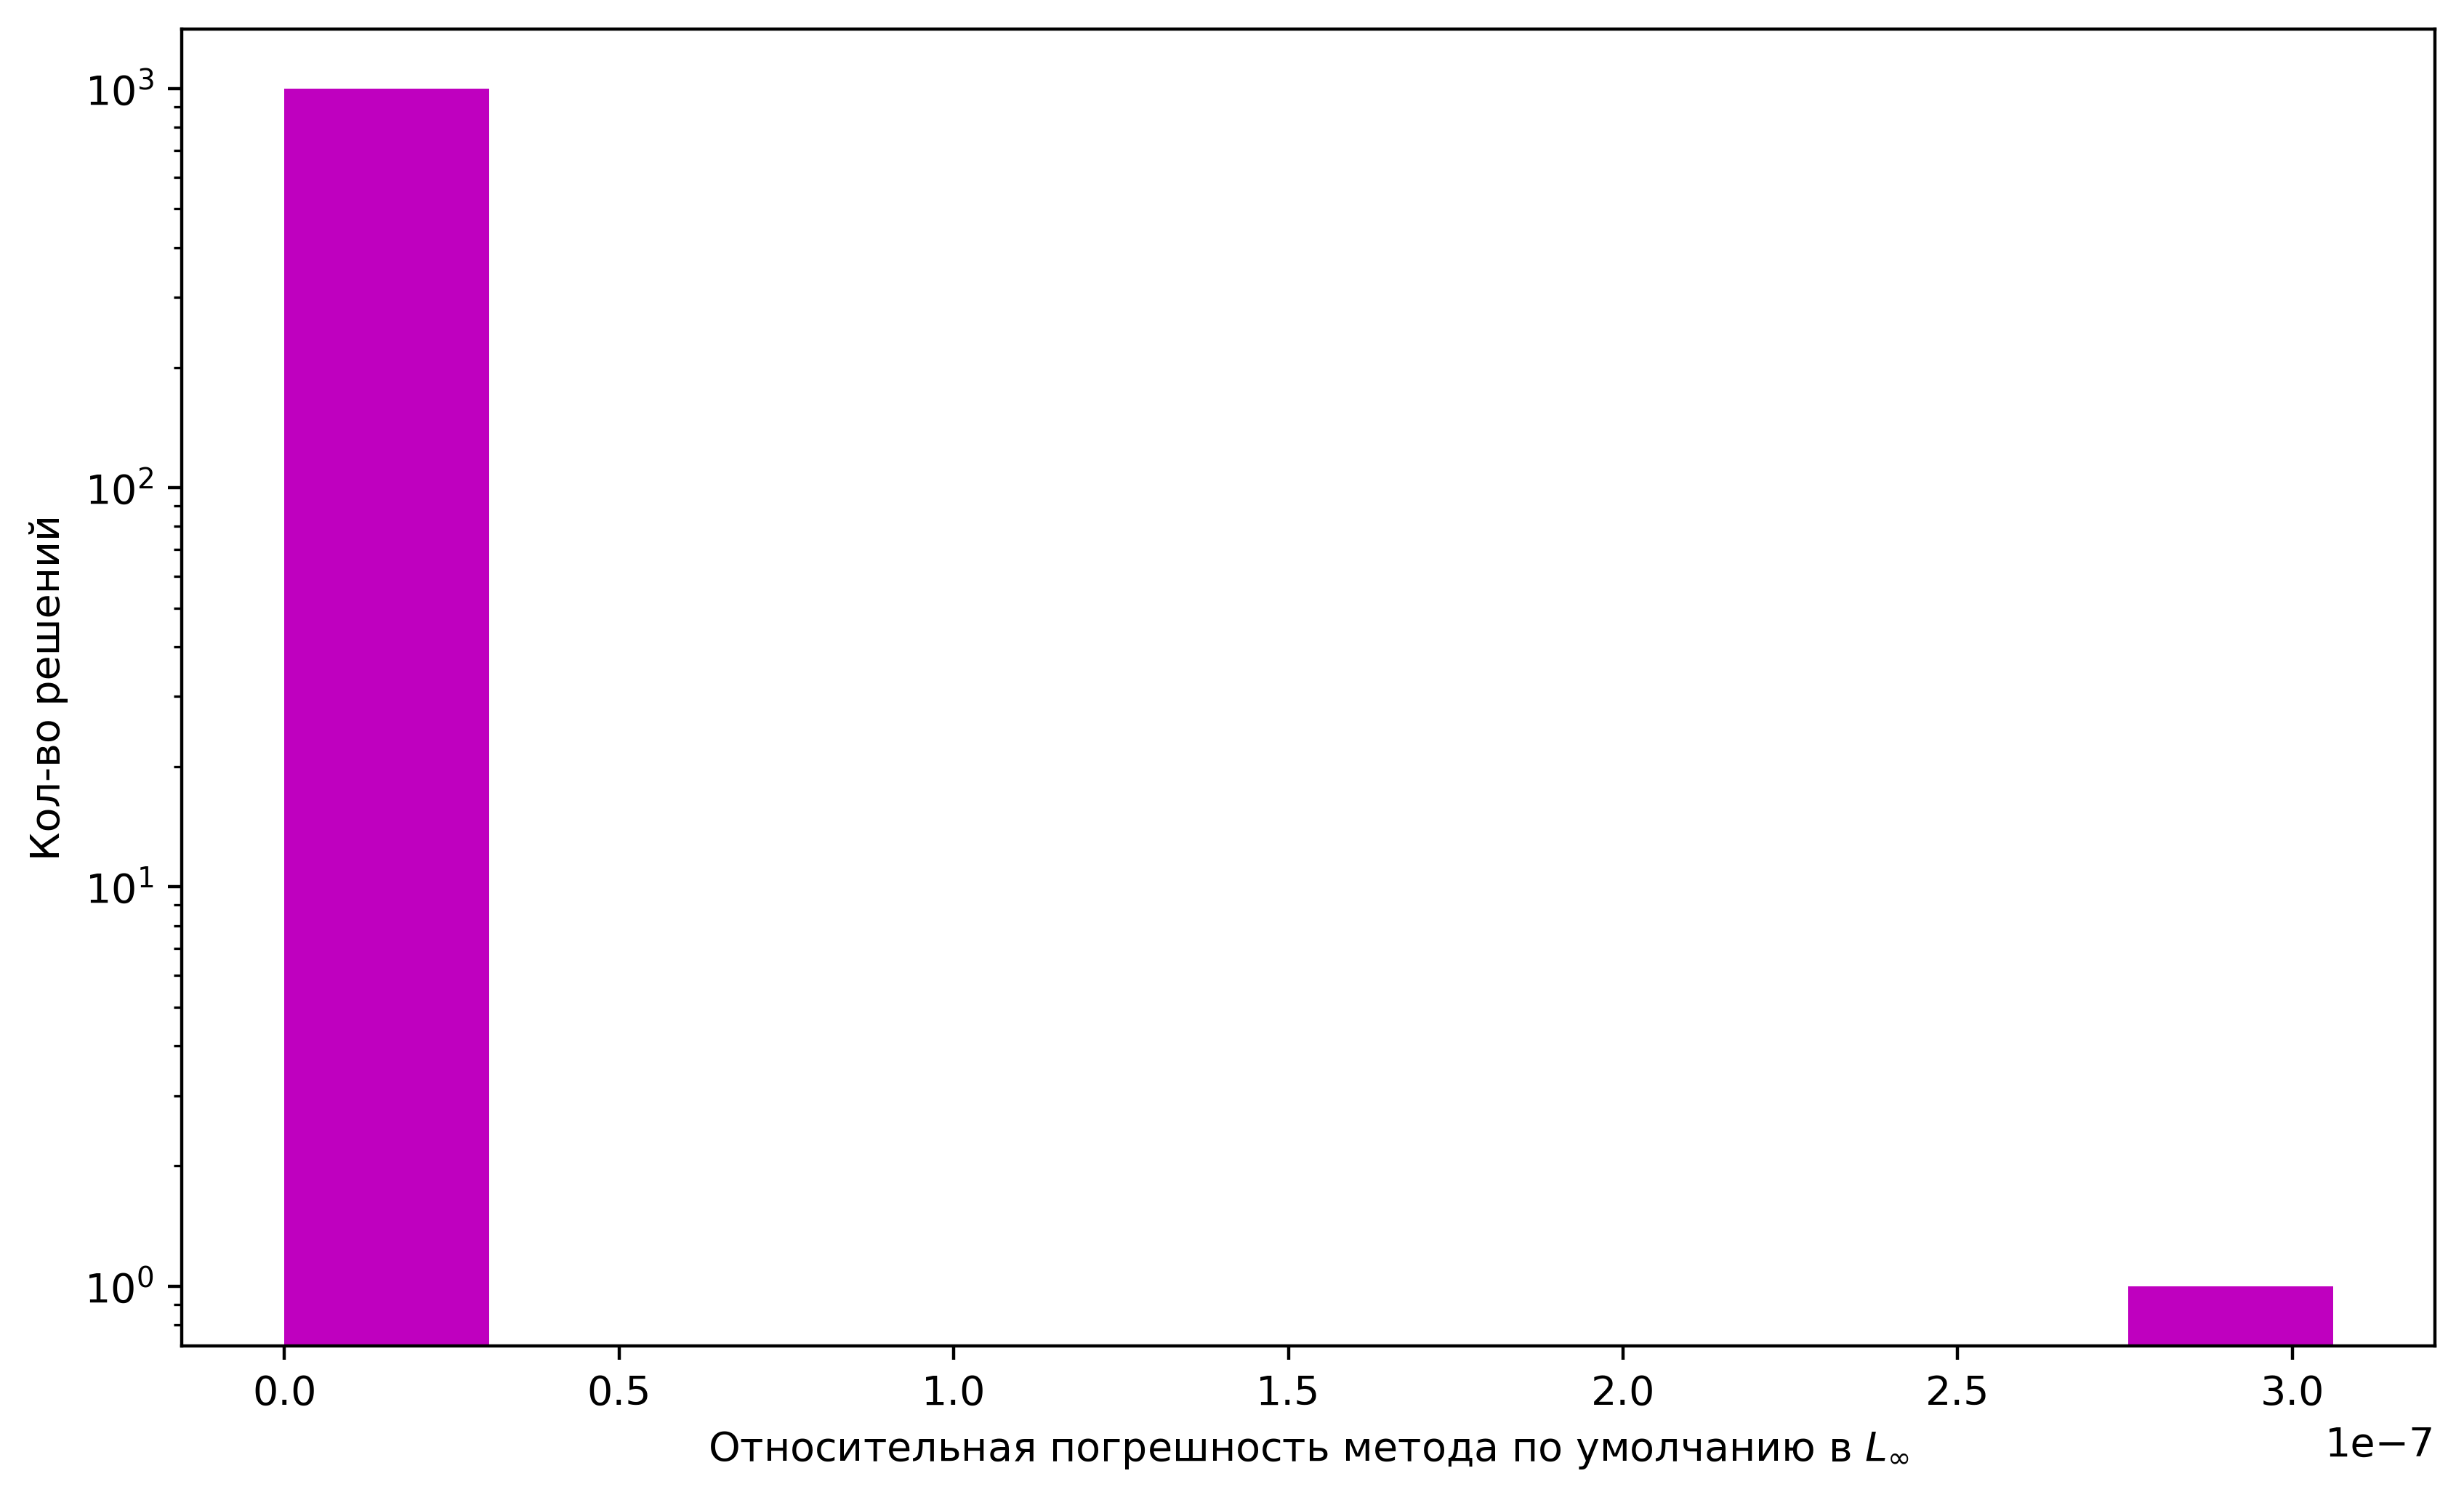

In [33]:
show_error(cholesky, positive_definite_matrices)